### INFORMATION ABOUT DATA
The data shows the sale of residential property in Ames, Iowa from 2006 to 2010. It has 2930 observations and intial analysis shows contains some explanatory variables (39 categorical, 4 temporal, 14 discrete, and 18 continuous variables after removal of 4 variables, 'Alley', 'Misc Feature', 'Pool QC') to predict home sale prices. Our tragte variable is the sale price of a house, indicated as SalePrice.

### MAIN OBJECTIVE
* The main objective of this work is to predict sale price of houses.

### INITIAL PLAN
* Determining Variable Types
* Review column names and understand what each label means.
* Based on variable types, developing variables encoding and imputation techniques
* For Categorical variables, identify Onehot encoding, frequent category encoding, integer encoding or rare categories and so on.
* For numerical variables, the identification of outlieer engineering, variable transformation(log transformation or others) missing data imputation and feature scaling
* Scatterplot of features to see the target and feature-target relationships
* Actions taken for data cleaning and feature engineering
* Dropping columns, impute missing variables and onehot encoding (total 75 features and 1 target variable).
* Converting string None to np.nan to show them as missing values to decide on how to proceed with them.
* ordinal variables are also dealt and transformed to numerical variables.
* Operation for Cardinality and Rare Labels are alo performed.
* Review target variable against other features and create plots against target.
* Target variable were also transformed and logarithmic function was used
* Remove columns:'Alley', 'Pool QC ', 'Fence', 'Misc Feature'.
* Feature selecttion by performance 9 variables were dropped. I selected the threshold somewhat arbitrarily as 10% to drop them. We can play with this a bit to select more or less variables. If we leave the parameter to None, then the class will select those features which performance is above the mean performance of the group. So i dropped the variable explains below 10% of the total variability in the data.


### Summary of training at least three linear regression
* I used train_test_split to shuffle the data and create X_train, y_train, X_test, y_test
* First, a regular linear regression was performed and fit and model performance was checked by using two metrics - R-squared value and Mean Squared Error (MSE).
* Ideally, lower MSE and higher R-squared values are indicative of a good model.

**The linear regression analysis showed interesting results. Linear Regression Results:**

- LINEAR-MSE:0.10
- TRAIN-SCORE:0.89
- TEST-SCORE: 0.93


**I also applied ridge regression for the data set.**

- RIDGE-MSE:0.01
- TRAIN-SCORE:0.89
- TEST-SCORE: 0.93

BOTH LINEAR REGRESSION AND RIDGRE REGRESSION RESULTS SHOWED SIMILAR RESULTS: I THINK I NEED TO TRY DIFFERENT ALPHA VALUES TO OBSERVE ITS EFFECT.

**As a last resort, I also applied lasso regression to see the impact of MSE VALUES.**

A larger MSE means that the data values are dispersed widely around its central moment (mean), and a smaller MSE means otherwise and it is definitely the preferred and/or desired choice as it shows that your data values are dispersed closely to its central moment (mean); which is usually great. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. However, in this case i have already performed feature selection So I do not need L1 regularization.

- LASSO-MSE:0.03
- TRAIN-SCORE:0.76
- TEST-SCORE: 0.85

**In conclusion, ridge regression results show promising because MSE values are smaller which is good for the dispersion of data values around the mean**. Therefore, by finding best alpha values this model can be improved. There are other iterations that can be done to improve model performance. The value of alpha can be altered by hyper parameter tuning to arrive at the optimal alpha value. Cross-validation can also be tried along with feature selection techniques.

### Recommendation
During the feature engineering phase, there is a need for domain knowledge for some variables. In particular, combining some variables or removing them requires expertise in the field. Apart from that, feature selection phase was performed arbitrarily so an expert view is rwequired.

### Suggestion for Next Steps
All categorical, discrete, temporal and contnous variables should be in detail examined. This data is not clean so it requires extra for for feature engineering, which makes also domain knowledge necessary.
Only the types of linear regression analysis was employed different regression methods can be utilized.
For hyperparameters tuning, RIDGECV; LASSOCV OR GRIDSERACHCV can be used to find the best lambda or alpha values.

### The Quality of Data Set
The data is not clean and some features contain many missing values.

### Key Findings
- At the beginning there were almost 80 features and some features were dropped beacuse of missing data or feature selection process.
The mean of Lot Area is 10147 square feet and the maximum size is 215245 whereas the minumum lot size of ahouse is 1300 sqf.
The minimum sale price of a house is 12789 USA Dollar; whereas the maximum price is equal to 755000 Dollar.
The garage size gives interesting information. The minimum size of a garage is 472 square feet whereas the biggest one is 1488 sqf.
Above grade (ground) living area shows the higher correlation with sale price. When the size of it increases, the sale price increases too. The minimum size for it is 334, whereas the maximum size is 5642 square feet.
There are some other variables which also explain the variation in the data. For example, there are expensive and cheap houses depending on the neighborhood. So neighborhood is likely to explain the variation of sale perice of a hosue. Apart from that, among the categorical variables Foundation, MS SubClass, Garage Type, Mas Vnr Type stand out.
Since the lowest value of mean squared error belongs to Ridge regression, I think it complies with the objective of this study. In particular, hypertuning process can be improved more to achieve the objective of this work.
Here we can see the linear regression model is giving higher Test MSE. So I tried ridgre regression model with different alphas. And we know that for higher values of lamda regularization parameter ,we will be having Higher bias, less variance resulting in not optimal model,but worse model than normal regression. To avoid high error We should be taking the optimal value of regularization parameter.
DATA DICTIONARY (SOME EXAMPLES)
Gr Liv Area: Above grade (ground) living area square feet
Garage Area: Size of garage in square feet
LotArea: Lot size in square feet
Sale Price: Sale price of a house

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


# Feature-engine's modules for feature egineering
from feature_engine import creation
from feature_engine import discretisation as disc
from feature_engine import encoding as enc
from feature_engine import imputation as imp
from feature_engine import selection as sel
from feature_engine.selection import SelectByTargetMeanPerformance
sns.set()
pd.options.display.max_rows = 999

In [ ]:
## Load in the Ames Housing Data
datafile = "data/Ames_Housing_Data.tsv"
df = pd.read_csv(datafile, sep='\t')
df.head().T

0          1          2          3          4
Order                    1          2          3          4          5
PID              526301100  526350040  526351010  526353030  527105010
MS SubClass             20         20         20         20         60
MS Zoning               RL         RH         RL         RL         RL
Lot Frontage           141         80         81         93         74
Lot Area             31770      11622      14267      11160      13830
Street                Pave       Pave       Pave       Pave       Pave
Alley                  NaN        NaN        NaN        NaN        NaN
Lot Shape              IR1        Reg        IR1        Reg        IR1
Land Contour           Lvl        Lvl        Lvl        Lvl        Lvl
Utilities           AllPub     AllPub     AllPub     AllPub     AllPub
Lot Config          Corner     Inside     Corner     Corner     Inside
Land Slope             Gtl        Gtl        Gtl        Gtl        Gtl
Neighborhood         NAmes      NAmes      NAmes      NAmes    Gilbert
Condition 1           Norm      Feedr       Norm       Norm       Norm
Condition 2           Norm       Norm       Norm       Norm       Norm
Bldg Type             1Fam       1Fam       1Fam       1Fam       1Fam
House Style         1Story     1Story     1Story     1Story     2Story
Overall Qual             6          5          6          7          5
Overall Cond             5          6          6          5          5
Year Built            1960       1961       1958       1968       1997
Year Remod/Add        1960       1961       1958       1968       1998
Roof Style             Hip      Gable        Hip        Hip      Gable
Roof Matl          CompShg    CompShg    CompShg    CompShg    CompShg
Exterior 1st       BrkFace    VinylSd    Wd Sdng    BrkFace    VinylSd
Exterior 2nd       Plywood    VinylSd    Wd Sdng    BrkFace    VinylSd
Mas Vnr Type         Stone       None    BrkFace       None       None
Mas Vnr Area           112          0        108          0          0
Exter Qual              TA         TA         TA         Gd         TA
Exter Cond              TA         TA         TA         TA         TA
Foundation          CBlock     CBlock     CBlock     CBlock      PConc
Bsmt Qual               TA         TA         TA         TA         Gd
Bsmt Cond               Gd         TA         TA         TA         TA
Bsmt Exposure           Gd         No         No         No         No
BsmtFin Type 1         BLQ        Rec        ALQ        ALQ        GLQ
BsmtFin SF 1           639        468        923       1065        791
BsmtFin Type 2         Unf        LwQ        Unf        Unf        Unf
BsmtFin SF 2             0        144          0          0          0
Bsmt Unf SF            441        270        406       1045        137
Total Bsmt SF         1080        882       1329       2110        928
Heating               GasA       GasA       GasA       GasA       GasA
Heating QC              Fa         TA         TA         Ex         Gd
Central Air              Y          Y          Y          Y          Y
Electrical           SBrkr      SBrkr      SBrkr      SBrkr      SBrkr
1st Flr SF            1656        896       1329       2110        928
2nd Flr SF               0          0          0          0        701
Low Qual Fin SF          0          0          0          0          0
Gr Liv Area           1656        896       1329       2110       1629
Bsmt Full Bath           1          0          0          1          0
Bsmt Half Bath           0          0          0          0          0
Full Bath                1          1          1          2          2
Half Bath                0          0          1          1          1
Bedroom AbvGr            3          2          3          3          3
Kitchen AbvGr            1          1          1          1          1
Kitchen Qual            TA         TA         Gd         Ex         TA
TotRms AbvGrd            7          5          6 

In [ ]:
df= df.drop(['Order', 'PID'], axis=1)

In [ ]:
df.head().T

0        1        2        3        4
MS SubClass           20       20       20       20       60
MS Zoning             RL       RH       RL       RL       RL
Lot Frontage         141       80       81       93       74
Lot Area           31770    11622    14267    11160    13830
Street              Pave     Pave     Pave     Pave     Pave
Alley                NaN      NaN      NaN      NaN      NaN
Lot Shape            IR1      Reg      IR1      Reg      IR1
Land Contour         Lvl      Lvl      Lvl      Lvl      Lvl
Utilities         AllPub   AllPub   AllPub   AllPub   AllPub
Lot Config        Corner   Inside   Corner   Corner   Inside
Land Slope           Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood       NAmes    NAmes    NAmes    NAmes  Gilbert
Condition 1         Norm    Feedr     Norm     Norm     Norm
Condition 2         Norm     Norm     Norm     Norm     Norm
Bldg Type           1Fam     1Fam     1Fam     1Fam     1Fam
House Style       1Story   1Story   1Story   1Story   2Story
Overall Qual           6        5        6        7        5
Overall Cond           5        6        6        5        5
Year Built          1960     1961     1958     1968     1997
Year Remod/Add      1960     1961     1958     1968     1998
Roof Style           Hip    Gable      Hip      Hip    Gable
Roof Matl        CompShg  CompShg  CompShg  CompShg  CompShg
Exterior 1st     BrkFace  VinylSd  Wd Sdng  BrkFace  VinylSd
Exterior 2nd     Plywood  VinylSd  Wd Sdng  BrkFace  VinylSd
Mas Vnr Type       Stone     None  BrkFace     None     None
Mas Vnr Area         112        0      108        0        0
Exter Qual            TA       TA       TA       Gd       TA
Exter Cond            TA       TA       TA       TA       TA
Foundation        CBlock   CBlock   CBlock   CBlock    PConc
Bsmt Qual             TA       TA       TA       TA       Gd
Bsmt Cond             Gd       TA       TA       TA       TA
Bsmt Exposure         Gd       No       No       No       No
BsmtFin Type 1       BLQ      Rec      ALQ      ALQ      GLQ
BsmtFin SF 1         639      468      923     1065      791
BsmtFin Type 2       Unf      LwQ      Unf      Unf      Unf
BsmtFin SF 2           0      144        0        0        0
Bsmt Unf SF          441      270      406     1045      137
Total Bsmt SF       1080      882     1329     2110      928
Heating             GasA     GasA     GasA     GasA     GasA
Heating QC            Fa       TA       TA       Ex       Gd
Central Air            Y        Y        Y        Y        Y
Electrical         SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
1st Flr SF          1656      896     1329     2110      928
2nd Flr SF             0        0        0        0      701
Low Qual Fin SF        0        0        0        0        0
Gr Liv Area         1656      896     1329     2110     1629
Bsmt Full Bath         1        0        0        1        0
Bsmt Half Bath         0        0        0        0        0
Full Bath              1        1        1        2        2
Half Bath              0        0        1        1        1
Bedroom AbvGr          3        2        3        3        3
Kitchen AbvGr          1        1        1        1        1
Kitchen Qual          TA       TA       Gd       Ex       TA
TotRms AbvGrd          7        5        6        8        6
Functional           Typ      Typ      Typ      Typ      Typ
Fireplaces             2        0        0        2        1
Fireplace Qu          Gd      NaN      NaN       TA       TA
Garage Type       Attchd   Attchd   Attchd   Attchd   Attchd
Garage Yr Blt       1960     1961     1958     1968     1997
Garage Finish        Fin      Unf      Unf      Fin      Fin
Garage Cars            2        1        1        2        2
Garage Area          528      730      312      522      482
Garage Qual           TA       TA       TA       TA       TA
Garage Cond           TA       TA       TA       TA       TA
Paved Drive            P        Y        Y        Y       

In [ ]:
# this data does not have the target
check=df.drop(['SalePrice'], axis=1)

In [ ]:
check.head().T

0        1        2        3        4
MS SubClass           20       20       20       20       60
MS Zoning             RL       RH       RL       RL       RL
Lot Frontage         141       80       81       93       74
Lot Area           31770    11622    14267    11160    13830
Street              Pave     Pave     Pave     Pave     Pave
Alley                NaN      NaN      NaN      NaN      NaN
Lot Shape            IR1      Reg      IR1      Reg      IR1
Land Contour         Lvl      Lvl      Lvl      Lvl      Lvl
Utilities         AllPub   AllPub   AllPub   AllPub   AllPub
Lot Config        Corner   Inside   Corner   Corner   Inside
Land Slope           Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood       NAmes    NAmes    NAmes    NAmes  Gilbert
Condition 1         Norm    Feedr     Norm     Norm     Norm
Condition 2         Norm     Norm     Norm     Norm     Norm
Bldg Type           1Fam     1Fam     1Fam     1Fam     1Fam
House Style       1Story   1Story   1Story   1Story   2Story
Overall Qual           6        5        6        7        5
Overall Cond           5        6        6        5        5
Year Built          1960     1961     1958     1968     1997
Year Remod/Add      1960     1961     1958     1968     1998
Roof Style           Hip    Gable      Hip      Hip    Gable
Roof Matl        CompShg  CompShg  CompShg  CompShg  CompShg
Exterior 1st     BrkFace  VinylSd  Wd Sdng  BrkFace  VinylSd
Exterior 2nd     Plywood  VinylSd  Wd Sdng  BrkFace  VinylSd
Mas Vnr Type       Stone     None  BrkFace     None     None
Mas Vnr Area         112        0      108        0        0
Exter Qual            TA       TA       TA       Gd       TA
Exter Cond            TA       TA       TA       TA       TA
Foundation        CBlock   CBlock   CBlock   CBlock    PConc
Bsmt Qual             TA       TA       TA       TA       Gd
Bsmt Cond             Gd       TA       TA       TA       TA
Bsmt Exposure         Gd       No       No       No       No
BsmtFin Type 1       BLQ      Rec      ALQ      ALQ      GLQ
BsmtFin SF 1         639      468      923     1065      791
BsmtFin Type 2       Unf      LwQ      Unf      Unf      Unf
BsmtFin SF 2           0      144        0        0        0
Bsmt Unf SF          441      270      406     1045      137
Total Bsmt SF       1080      882     1329     2110      928
Heating             GasA     GasA     GasA     GasA     GasA
Heating QC            Fa       TA       TA       Ex       Gd
Central Air            Y        Y        Y        Y        Y
Electrical         SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
1st Flr SF          1656      896     1329     2110      928
2nd Flr SF             0        0        0        0      701
Low Qual Fin SF        0        0        0        0        0
Gr Liv Area         1656      896     1329     2110     1629
Bsmt Full Bath         1        0        0        1        0
Bsmt Half Bath         0        0        0        0        0
Full Bath              1        1        1        2        2
Half Bath              0        0        1        1        1
Bedroom AbvGr          3        2        3        3        3
Kitchen AbvGr          1        1        1        1        1
Kitchen Qual          TA       TA       Gd       Ex       TA
TotRms AbvGrd          7        5        6        8        6
Functional           Typ      Typ      Typ      Typ      Typ
Fireplaces             2        0        0        2        1
Fireplace Qu          Gd      NaN      NaN       TA       TA
Garage Type       Attchd   Attchd   Attchd   Attchd   Attchd
Garage Yr Blt       1960     1961     1958     1968     1997
Garage Finish        Fin      Unf      Unf      Fin      Fin
Garage Cars            2        1        1        2        2
Garage Area          528      730      312      522      482
Garage Qual           TA       TA       TA       TA       TA
Garage Cond           TA       TA       TA       TA       TA
Paved Drive            P        Y        Y        Y       

### EDA

In [ ]:
## Examine the columns, look at missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [ ]:
df.describe().T

count           mean           std      min        25%  \
MS SubClass      2930.0      57.387372     42.638025     20.0      20.00   
Lot Frontage     2440.0      69.224590     23.365335     21.0      58.00   
Lot Area         2930.0   10147.921843   7880.017759   1300.0    7440.25   
Overall Qual     2930.0       6.094881      1.411026      1.0       5.00   
Overall Cond     2930.0       5.563140      1.111537      1.0       5.00   
Year Built       2930.0    1971.356314     30.245361   1872.0    1954.00   
Year Remod/Add   2930.0    1984.266553     20.860286   1950.0    1965.00   
Mas Vnr Area     2907.0     101.896801    179.112611      0.0       0.00   
BsmtFin SF 1     2929.0     442.629566    455.590839      0.0       0.00   
BsmtFin SF 2     2929.0      49.722431    169.168476      0.0       0.00   
Bsmt Unf SF      2929.0     559.262547    439.494153      0.0     219.00   
Total Bsmt SF    2929.0    1051.614544    440.615067      0.0     793.00   
1st Flr SF       2930.0    1159.557679    391.890885    334.0     876.25   
2nd Flr SF       2930.0     335.455973    428.395715      0.0       0.00   
Low Qual Fin SF  2930.0       4.676792     46.310510      0.0       0.00   
Gr Liv Area      2930.0    1499.690444    505.508887    334.0    1126.00   
Bsmt Full Bath   2928.0       0.431352      0.524820      0.0       0.00   
Bsmt Half Bath   2928.0       0.061134      0.245254      0.0       0.00   
Full Bath        2930.0       1.566553      0.552941      0.0       1.00   
Half Bath        2930.0       0.379522      0.502629      0.0       0.00   
Bedroom AbvGr    2930.0       2.854266      0.827731      0.0       2.00   
Kitchen AbvGr    2930.0       1.044369      0.214076      0.0       1.00   
TotRms AbvGrd    2930.0       6.443003      1.572964      2.0       5.00   
Fireplaces       2930.0       0.599317      0.647921      0.0       0.00   
Garage Yr Blt    2771.0    1978.132443     25.528411   1895.0    1960.00   
Garage Cars      2929.0       1.766815      0.760566      0.0       1.00   
Garage Area      2929.0     472.819734    215.046549      0.0     320.00   
Wood Deck SF     2930.0      93.751877    126.361562      0.0       0.00   
Open Porch SF    2930.0      47.533447     67.483400      0.0       0.00   
Enclosed Porch   2930.0      23.011604     64.139059      0.0       0.00   
3Ssn Porch       2930.0       2.592491     25.141331      0.0       0.00   
Screen Porch     2930.0      16.002048     56.087370      0.0       0.00   
Pool Area        2930.0       2.243345     35.597181      0.0       0.00   
Misc Val         2930.0      50.635154    566.344288      0.0       0.00   
Mo Sold          2930.0       6.216041      2.714492      1.0       4.00   
Yr Sold          2930.0    2007.790444      1.316613   2006.0    2007.00   
SalePrice        2930.0  180796.060068  79886.692357  12789.0  129500.00   

                      50%        75%       max  
MS SubClass          50.0      70.00     190.0  
Lot Frontage         68.0      80.00     313.0  
Lot Area           9436.5   11555.25  215245.0  
Overall Qual          6.0       7.00      10.0  
Overall Cond          5.0       6.00       9.0  
Year Built         1973.0    2001.00    2010.0  
Year Remod/Add     1993.0    2004.00    2010.0  
Mas Vnr Area          0.0     164.00    1600.0  
BsmtFin SF 1        370.0     734.00    5644.0  
BsmtFin SF 2          0.0       0.00    1526.0  
Bsmt Unf SF         466.0     802.00    2336.0  
Total Bsmt SF       990.0    1302.00    6110.0  
1st Flr SF         1084.0    1384.00    5095.0  
2nd Flr SF            0.0     703.75    2065.0  
Low Qual Fin SF       0.0       0.00    1064.0  
Gr Liv Area        1442.0    1742.75    5642.0  
Bsmt Full Bath        0.0       1.00       3.0  
Bsmt Half Bath        0.0       0.00       2.0  
Full Bath             2.0       2.00       4.0  
Half Bath             0.0       1.00       2.0  
Bedroom AbvGr         3.0       3.00       8.0  
Kitchen AbvGr         1.0       1.00       3.0  
To

In [ ]:
df.isnull().mean()

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage       0.167235
Lot Area           0.000000
Street             0.000000
Alley              0.932423
Lot Shape          0.000000
Land Contour       0.000000
Utilities          0.000000
Lot Config         0.000000
Land Slope         0.000000
Neighborhood       0.000000
Condition 1        0.000000
Condition 2        0.000000
Bldg Type          0.000000
House Style        0.000000
Overall Qual       0.000000
Overall Cond       0.000000
Year Built         0.000000
Year Remod/Add     0.000000
Roof Style         0.000000
Roof Matl          0.000000
Exterior 1st       0.000000
Exterior 2nd       0.000000
Mas Vnr Type       0.007850
Mas Vnr Area       0.007850
Exter Qual         0.000000
Exter Cond         0.000000
Foundation         0.000000
Bsmt Qual          0.027304
Bsmt Cond          0.027304
Bsmt Exposure      0.028328
BsmtFin Type 1     0.027304
BsmtFin SF 1       0.000341
BsmtFin Type 2     0.027645
BsmtFin SF 2       0

In [ ]:
data =df.copy() 

In [ ]:
# split training data into train and test

X_train, X_test, y_train, y_test = train_test_split(data.drop(
    ['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.05,
    random_state=0)

X_train.shape, X_test.shape

((2783, 79), (147, 79))

In [ ]:
check.shape

(2930, 79)

In [ ]:
# retrieved from https://www.kaggle.com/solegalli/predict-house-price-with-feature-engine
# function to create a dataset with all the train, test and subimssion, 
# so I can easily compare the variable distributions

def create_master_data(train, test, check, y_train, y_test):
    
    train = train.copy()
    test = test.copy()
    check = check.copy()
    
    train['target'] = y_train
    train['data'] = 'train'
    train.reset_index(drop=True, inplace=True)
    
    test['target'] = y_test
    test['data'] = 'test'
    test.reset_index(drop=True, inplace=True)
    
    check['target'] = np.nan
    check['data'] = 'check'
    check.reset_index(drop=True, inplace=True)
    
    master_data = pd.concat([train, test, check], axis=0)
    master_data.reset_index(drop=True, inplace=True)
    
    return master_data

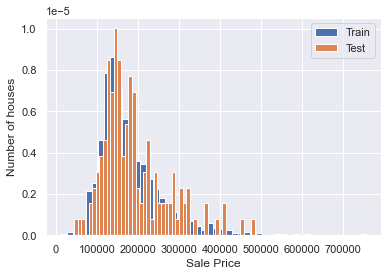

In [ ]:
# histogran to evaluate target distribution

y_train.hist(bins=50, density=True)
y_test.hist(bins=50, density=True)

plt.legend(["Train", "Test"])
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

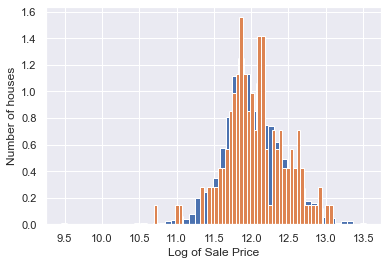

In [ ]:
# The transformation of the target

np.log(y_train).hist(bins=50, density=True)
np.log(y_test).hist(bins=50, density=True)

plt.ylabel('Number of houses')
plt.xlabel('Log of Sale Price')
plt.show()

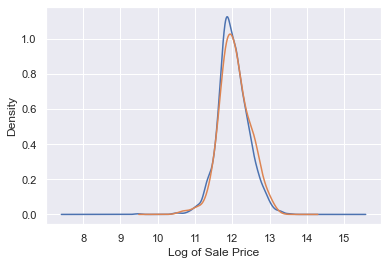

In [ ]:
# density plot instead of histogram
np.log(y_train).plot.density()
np.log(y_test).plot.density()

plt.xlabel('Log of Sale Price')
plt.show()

In [ ]:
# let's transform the target with the log

y_train = np.log(y_train)

y_test = np.log(y_test)

In [ ]:
categorical = [var for var in data.columns if data[var].dtype == 'O']
categorical = categorical + ['MS SubClass']
len(categorical)

44

In [ ]:
df['MS SubClass'].unique()

array([ 20,  60, 120,  50,  85, 160,  80,  30,  90, 190,  45,  70,  75,
        40, 180, 150], dtype=int64)

In [ ]:
X_train['MS SubClass'].value_counts() / len(X_train)

20     0.369386
60     0.194035
50     0.099174
120    0.066116
30     0.048509
70     0.043119
160    0.042760
80     0.039885
90     0.036651
190    0.021200
85     0.016888
75     0.007905
45     0.006109
180    0.005749
40     0.002156
150    0.000359
Name: MS SubClass, dtype: float64

In [ ]:
# cast all variables as categorical

X_train[categorical] = X_train[categorical].astype('O')
X_test[categorical] = X_test[categorical].astype('O')
check[categorical] = check[categorical].astype('O')

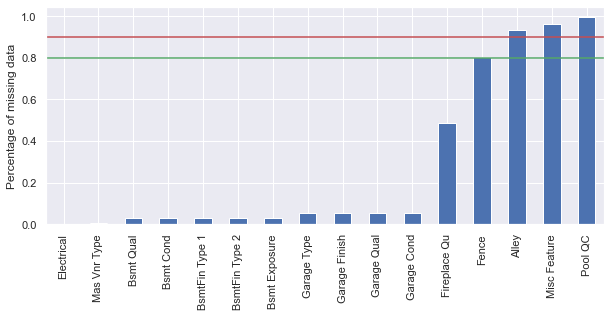

In [ ]:
# which categorical variables have missing data?

# capture categorical variables with NA in a dictionary
null_cat = {var: data[var].isnull().mean() for var in categorical if data[var].isnull().mean()>0}

# plot
pd.Series(null_cat).sort_values().plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing data')
plt.axhline(y = 0.90, color = 'r', linestyle = '-') 
plt.axhline(y = 0.80, color = 'g', linestyle = '-') 

plt.show()

**As df.info indicated before, there are 3 variables which have 90 percent of missing values. it should be evaluated to whether these variables informative or not, before removal from dataset**

In [ ]:
# create a temporary dataset with the interest variables
# based on null and not null sale price will be compared to see whether there seems a significant difference

tmp = pd.concat([X_train[['Alley', 'Misc Feature', 'Pool QC']].reset_index(drop=True),
                 y_train.reset_index(drop=True)], axis=1)

# replace null values by 1, or 0 otherwise
for var in ['Alley', 'Misc Feature', 'Pool QC']:
    tmp[var] = np.where(tmp[var].isnull(),1,0)


# plot mean sale price per null value or otherwise
g = sns.PairGrid(tmp, x_vars=['Alley', 'Misc Feature', 'Pool QC'], y_vars=['SalePrice'])
g.map(sns.barplot)
plt.ylim(10,13)   
plt.show()

**They don't seem to be predictive so they will be dropped**.

In [ ]:
# DropFeatures allows me to drop selected feature groups from data

drop_features = sel.DropFeatures(features_to_drop = ['Alley', 'Misc Feature', 'Pool QC'])

X_train = drop_features.fit_transform(X_train)
X_test = drop_features.transform(X_test)
check = drop_features.transform(check)

X_train.shape, X_test.shape, check.shape

((2783, 76), (147, 76), (2930, 76))

In [ ]:
# impute missing data, categorical variables are detected automatically
# the imputer replaces missing data with the string 'Missing'

cat_imputer = imp.CategoricalImputer(return_object=True)

cat_imputer.fit(X_train)

# the variables to impute are stored in the variables attribute
cat_imputer.variables[0:5]

['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour']

In [ ]:
# remove missing data

X_train = cat_imputer.transform(X_train)
X_test = cat_imputer.transform(X_test)
check = cat_imputer.transform(check)

X_train.shape, X_test.shape, check.shape

((2783, 76), (147, 76), (2930, 76))

In [ ]:
# check that we do not have more missing data in categorical variables
# if we do, the list should not be empty

[c for c in cat_imputer.variables if X_train[c].isnull().sum()>0]

[]

##### Quasi-constant variables
Let's inspect if there are some variables that show predominantly 1 value in all observations.
we can use them to remove which has only 1 value or rare endocing.

In [ ]:
# assign the categorical variable list to the categorical variable name
# fetaure engine makes easy to reach cat variables
categorical = cat_imputer.variables

In [ ]:
# I ask the transformer to remove all variables that show the same value in more than
# 94% of the observations (tol=0.94)
# however as a first step I found which variables have this threshold Feature engine has simple way for it.
# or X_train['Street'].value_counts() / len(X_train) can be used
constant = sel.DropConstantFeatures(tol=0.94, variables=categorical)

# find constant features
constant.fit(X_train)

# the quasi-constant features are stored in this attribute
constant.features_to_drop_

['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating']

In [ ]:
X_train['Street'].value_counts() / len(X_train)

Pave    0.995688
Grvl    0.004312
Name: Street, dtype: float64

In [ ]:
X_train['Utilities'].value_counts() / len(X_train)

AllPub    0.998922
NoSewr    0.000719
NoSeWa    0.000359
Name: Utilities, dtype: float64

In [ ]:
X_train['Land Slope'].value_counts() / len(X_train)

Gtl    0.952210
Mod    0.042041
Sev    0.005749
Name: Land Slope, dtype: float64

In [ ]:
X_train['Condition 2'].value_counts() / len(X_train)

Norm      0.989220
Feedr     0.004671
Artery    0.001797
PosA      0.001437
PosN      0.001437
RRNn      0.000719
RRAe      0.000359
RRAn      0.000359
Name: Condition 2, dtype: float64

In [ ]:
X_train['Roof Matl'].value_counts() / len(X_train)

CompShg    0.984908
Tar&Grv    0.008264
WdShake    0.002875
WdShngl    0.002515
Roll       0.000359
Membran    0.000359
ClyTile    0.000359
Metal      0.000359
Name: Roof Matl, dtype: float64

In [ ]:
X_train['Heating'].value_counts() / len(X_train)

GasA     0.984908
GasW     0.008624
Grav     0.003234
Wall     0.002156
OthW     0.000719
Floor    0.000359
Name: Heating, dtype: float64

**As can be seen one value dominates the group more than 94 percent of cases.**

In [ ]:
# visaul analysis to compare train, test and original data show that one value dominates among other ctagoeries
# the function(created before) will be used (the source was declared above)
# put data together for analysis

datas = create_master_data(X_train, X_test, check, y_train, y_test)

datas.shape

(5860, 78)

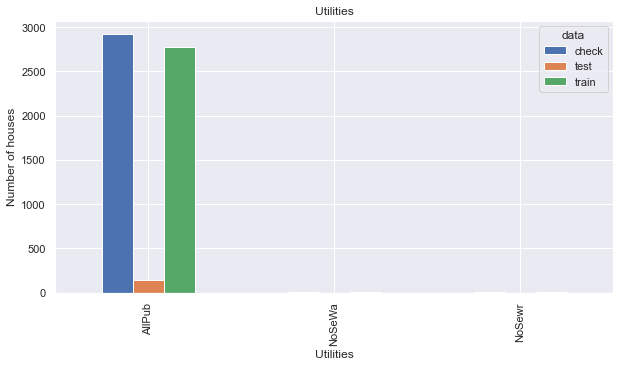

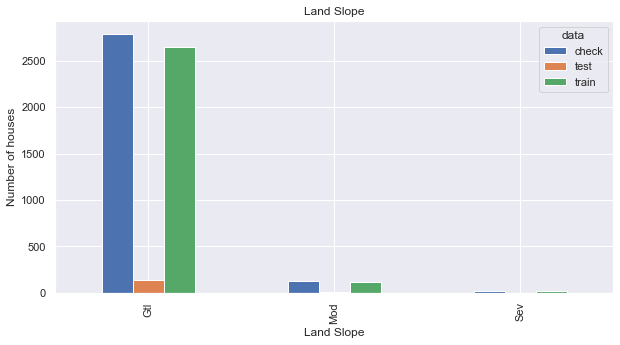

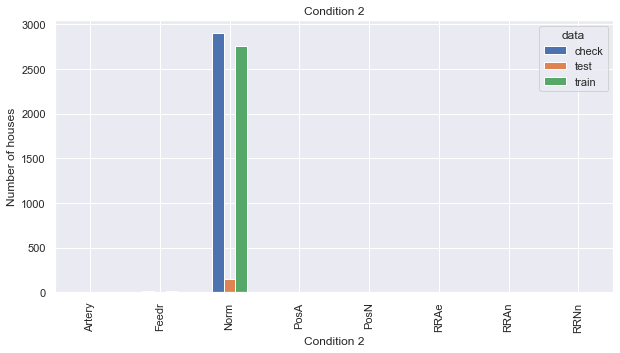

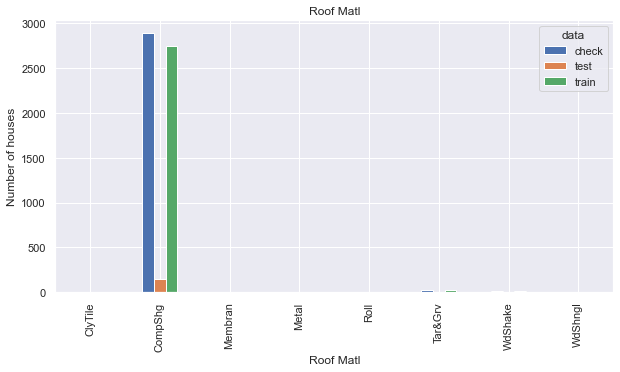

In [ ]:
# as can be seen variables have one dominant value in most of the observation
# # the quasi-constant features are stored in this attribute constant.features_to_drop_

for variable in constant.features_to_drop_:
    
    datas.groupby(variable)['data'].value_counts().unstack().plot.bar(figsize=(10,5))
    plt.title(variable)
    plt.ylabel('Number of houses')
    plt.show()


In [ ]:
# as fetaure enginnering method used in kaggle comptetions as well, this rare encoding method will be used 
# for dominant values seperates into two categories major vs other

# if a category is present in less than 10% of the observations, we group it with other
# infrequent categories (tol param)

rare_enc = enc.RareLabelEncoder(tol = 0.1,
                                n_categories=1, # number of minimum categories per variable for the grouping to proceed
                                variables=constant.features_to_drop_, # the variables to pre-process defined above
                                replace_with='Other', # the label to use to replace the original category
                               )

rare_enc.fit(X_train)

RareLabelEncoder(n_categories=1, replace_with='Other', tol=0.1,
                 variables=['Street', 'Utilities', 'Land Slope', 'Condition 2',
                            'Roof Matl', 'Heating'])

In [ ]:
# make the grouping

X_train = rare_enc.transform(X_train)
X_test = rare_enc.transform(X_test)
check = rare_enc.transform(check)

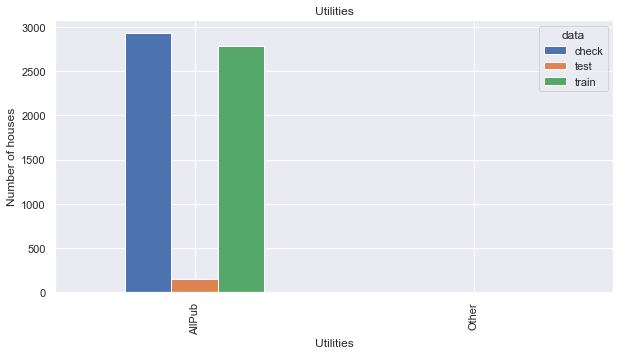

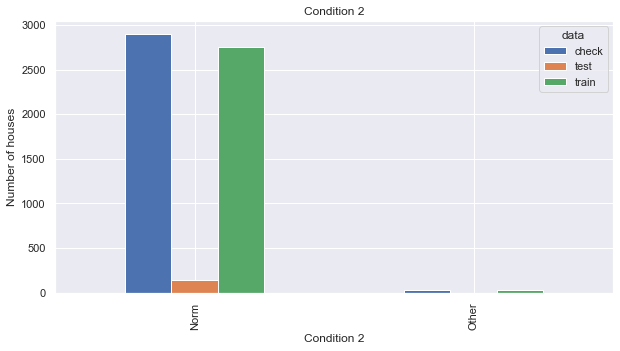

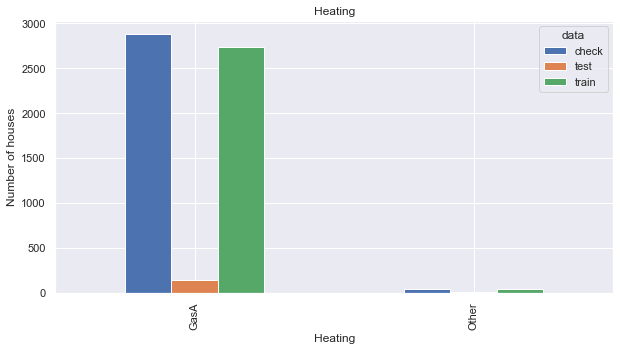

In [ ]:
# after plotting, the data again,  only 2 categories  are avilable in each variable

# put data together for analysis
datas = create_master_data(X_train, X_test, check, y_train, y_test)

for variable in constant.features_to_drop_:
    
    datas.groupby(variable)['data'].value_counts().unstack().plot.bar(figsize=(10,5))
    plt.title(variable)
    plt.ylabel('Number of houses')
    plt.show()

In [ ]:
X_train['Utilities'].value_counts() / len(X_train)

AllPub    0.998922
Other     0.001078
Name: Utilities, dtype: float64

In [ ]:
X_train['Street'].value_counts() / len(X_train)

Pave     0.995688
Other    0.004312
Name: Street, dtype: float64

In [ ]:
X_train['Land Slope'].value_counts() / len(X_train)

Gtl      0.95221
Other    0.04779
Name: Land Slope, dtype: float64

In [ ]:
X_train['Condition 2'].value_counts() / len(X_train)

Norm     0.98922
Other    0.01078
Name: Condition 2, dtype: float64

In [ ]:
X_train['Roof Matl'].value_counts() / len(X_train)

CompShg    0.984908
Other      0.015092
Name: Roof Matl, dtype: float64

In [ ]:
X_train['Heating'].value_counts() / len(X_train)

GasA     0.984908
Other    0.015092
Name: Heating, dtype: float64

In [ ]:
categorical

['MS SubClass',
 'MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Fence',
 'Sale Type',
 'Sale Condition']

### Quality variables
There are a number of variables that refer to the quality of some aspect of the house, for example the garage, or the fence, or the kitchen. I will replace these categories by numbers increasing with the quality of the place or room.

Ex = Excellent
Gd = Good
TA = Average/Typical
Fa = Fair
Po = Poor

In [ ]:
X_train['Exter Qual'].value_counts()

TA    1713
Gd     936
Ex     101
Fa      33
Name: Exter Qual, dtype: int64

In [ ]:
X_train['Exter Cond'].value_counts()

TA    2416
Gd     288
Fa      64
Ex      12
Po       3
Name: Exter Cond, dtype: int64

In [ ]:
X_train['Bsmt Qual'].value_counts()

TA         1227
Gd         1152
Ex          242
Fa           83
Missing      77
Po            2
Name: Bsmt Qual, dtype: int64

In [ ]:
X_train['Bsmt Cond'].value_counts()

TA         2489
Gd          114
Fa           97
Missing      77
Po            4
Ex            2
Name: Bsmt Cond, dtype: int64

In [ ]:
X_train['Heating QC'].value_counts()

Ex    1416
TA     820
Gd     457
Fa      88
Po       2
Name: Heating QC, dtype: int64

In [ ]:
X_train['Kitchen Qual'].value_counts()

TA    1416
Gd    1105
Ex     195
Fa      66
Po       1
Name: Kitchen Qual, dtype: int64

In [ ]:
X_train['Fireplace Qu'].value_counts()

Missing    1358
Gd          705
TA          559
Fa           73
Po           45
Ex           43
Name: Fireplace Qu, dtype: int64

In [ ]:
X_train['Garage Qual'].value_counts()

TA         2478
Missing     152
Fa          122
Gd           23
Po            5
Ex            3
Name: Garage Qual, dtype: int64

In [ ]:
X_train['Garage Cond'].value_counts()

TA         2527
Missing     152
Fa           72
Gd           15
Po           14
Ex            3
Name: Garage Cond, dtype: int64

In [ ]:
#X_train['Condition 1'].value_counts()

In [ ]:
qual_ord = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}
qual_vars = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
             'Heating QC', 'Kitchen Qual', 'Fireplace Qu',
             'Garage Qual', 'Garage Cond',
            ]

for var in qual_vars:
    X_train[var] = X_train[var].map(qual_ord)
    X_test[var] = X_test[var].map(qual_ord)
    check[var] = check[var].map(qual_ord)

In [ ]:
X_train['Bsmt Exposure'].value_counts()

No         1804
Av          396
Gd          274
Mn          229
Missing      80
Name: Bsmt Exposure, dtype: int64

In [ ]:
exposure_ord = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'Bsmt Exposure'

X_train[var] = X_train[var].map(exposure_ord)
X_test[var] = X_test[var].map(exposure_ord)
check[var] = check[var].map(exposure_ord)

In [ ]:
#X_train['Condition 1'].value_counts()

In [ ]:
fin_ord = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFin Type 1', 'BsmtFin Type 2']

for var in finish_vars:
    X_train[var] = X_train[var].map(fin_ord)
    X_test[var] = X_test[var].map(fin_ord)
    check[var] = check[var].map(fin_ord)

In [ ]:
X_train['Garage Finish'].value_counts()  

Unf        1179
RFn         767
Fin         685
Missing     152
Name: Garage Finish, dtype: int64

In [ ]:
garage_ord = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'Garage Finish'

X_train[var] = X_train[var].map(garage_ord)
X_test[var] = X_test[var].map(garage_ord)
check[var] = check[var].map(garage_ord)

In [ ]:
X_train['Fence'].value_counts()  

Missing    2230
MnPrv       319
GdPrv       115
GdWo        108
MnWw         11
Name: Fence, dtype: int64

In [ ]:
fence_ord = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

X_train[var] = X_train[var].map(fence_ord)
X_test[var] = X_test[var].map(fence_ord)
check[var] = check[var].map(fence_ord)

In [ ]:
# COMBINE ALL ORDINAL VARS

qual_vars  = qual_vars + finish_vars + ['Bsmt Exposure','Garage Finish','Fence']

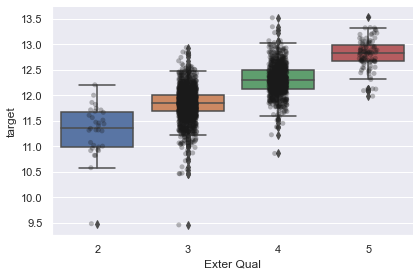

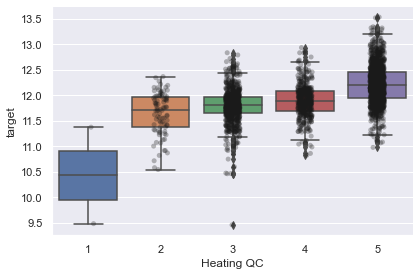

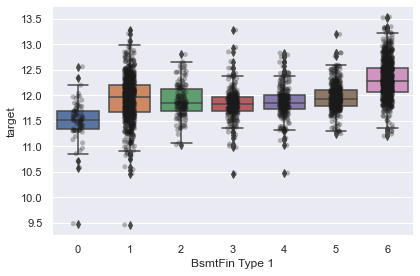

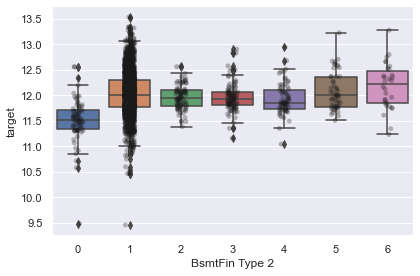

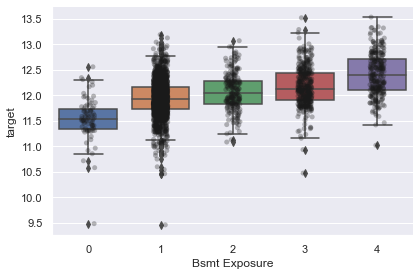

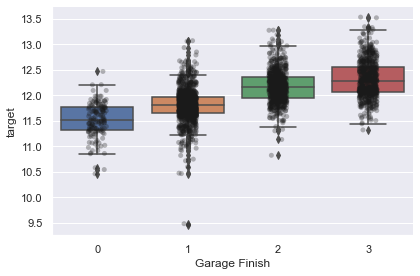

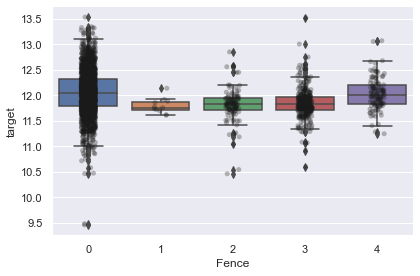

In [ ]:
# now let's plot the house mean sale price based on the quality of the 
# various attributes

# put data together for analysis
datas = create_master_data(X_train, X_test, check, y_train, y_test)

for var in qual_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='target', data=datas[datas['data']=='train'], kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='target', data=datas[datas['data']=='train'], jitter=0.1, alpha=0.3, color='k')
    plt.show()

**As can be seen from the plots there is an increase in the house price based on the quality.**

##### Cardinality
Cardinality indicates the number of unique values or categories per variable. The highest the cardinality, the more difficult the variable is to handle. Although it could provide more information.

In [ ]:
# let's collect the remaining categorical variables

categorical = [c for c in categorical if c not in constant.features_to_drop_]

categorical = [c for c in categorical if c not in qual_vars]

len(categorical)

21

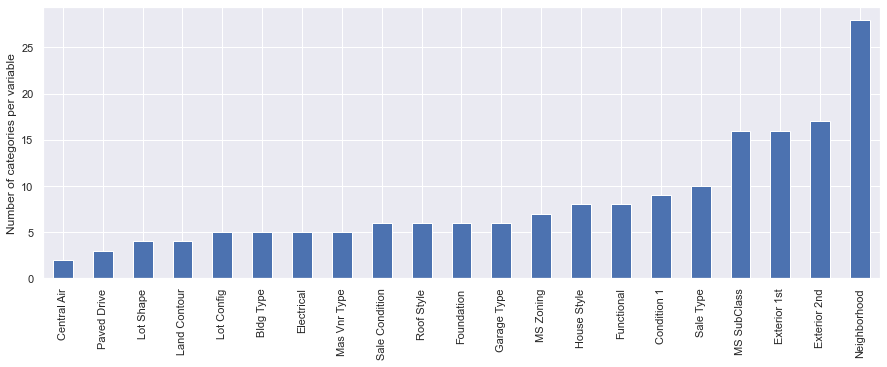

In [ ]:
# with nunique from pandas we count the number of unique categories per variable

data[categorical].nunique().sort_values().plot.bar(figsize=(15,5))
plt.ylabel('Number of categories per variable')
plt.show()

Some variables have few categories (low cardinality), others have a lot of categories (high cardinality).

In addition to the number of unique categories, it is important to know how many observations in the dataset show each category. Rare categories tend to bring problems when building the models, with little reliable information, precisely, because there are not a lot of observations to learn from.

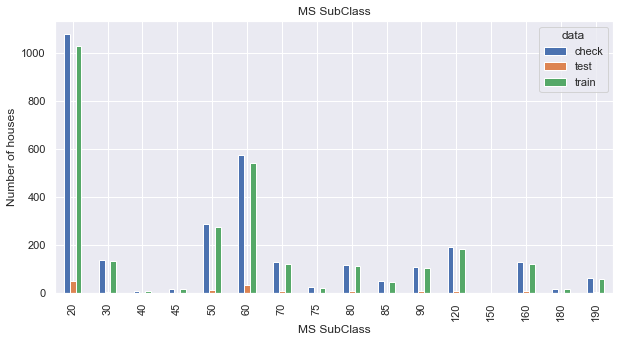

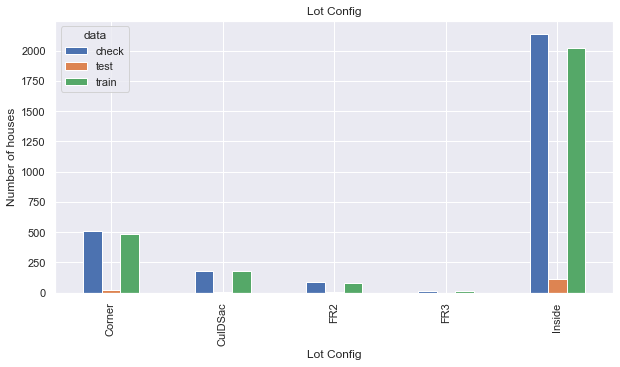

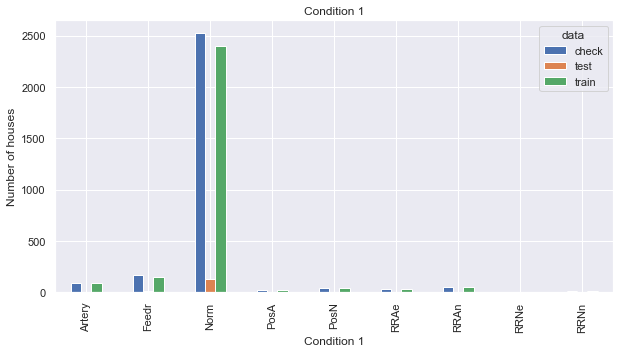

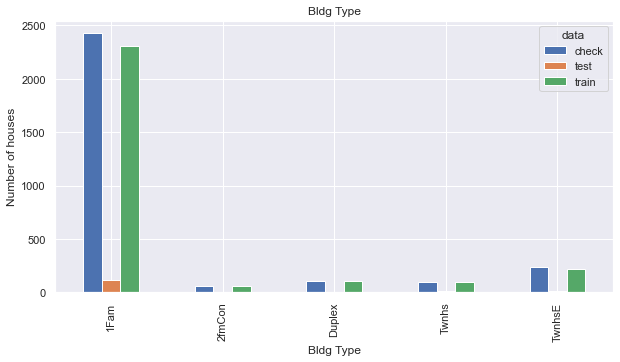

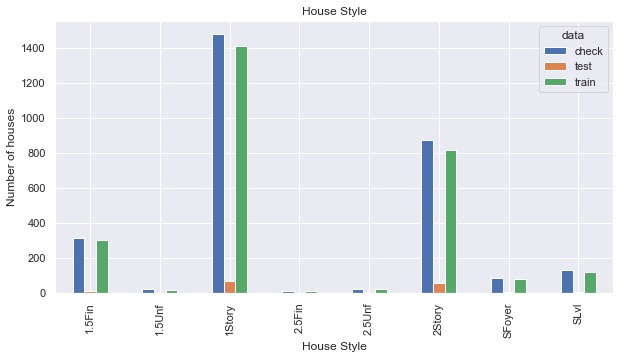

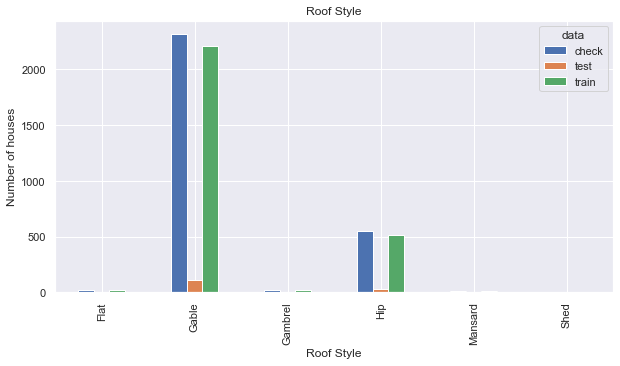

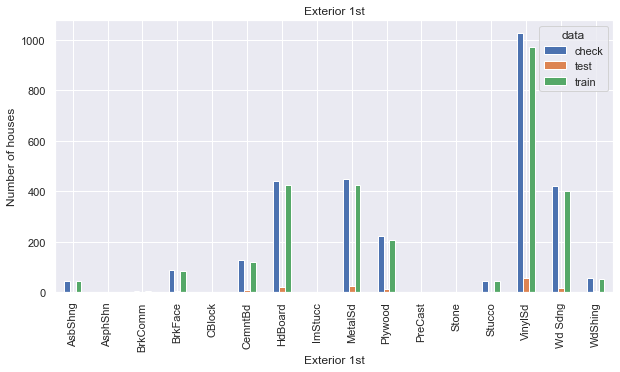

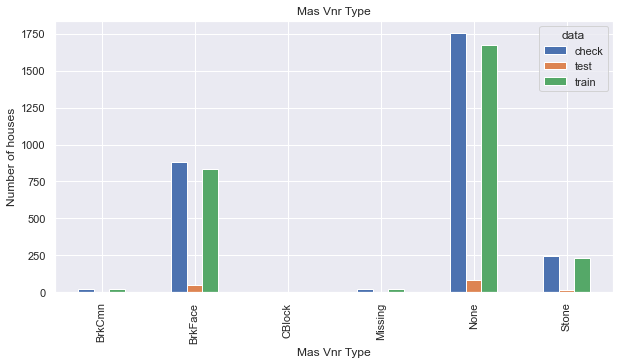

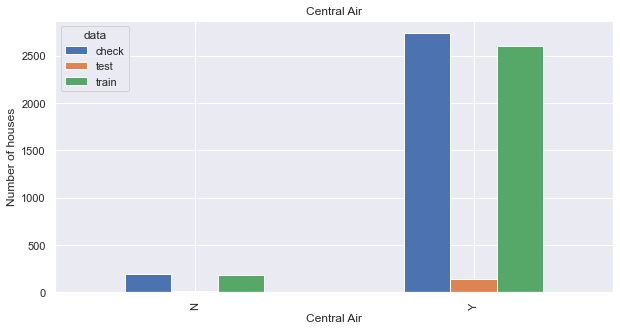

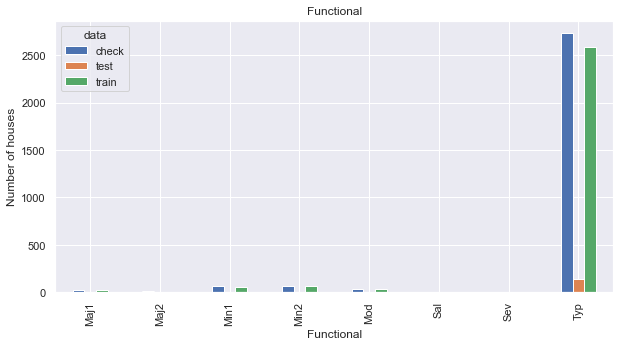

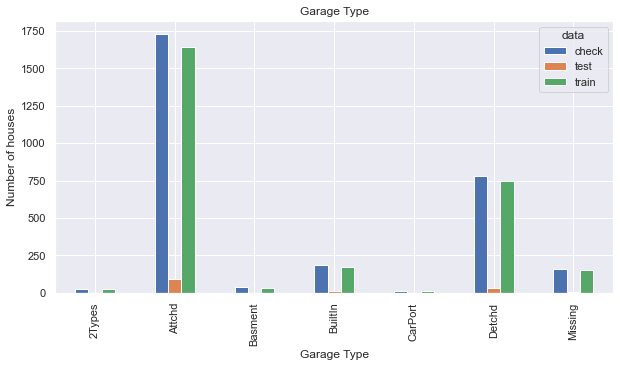

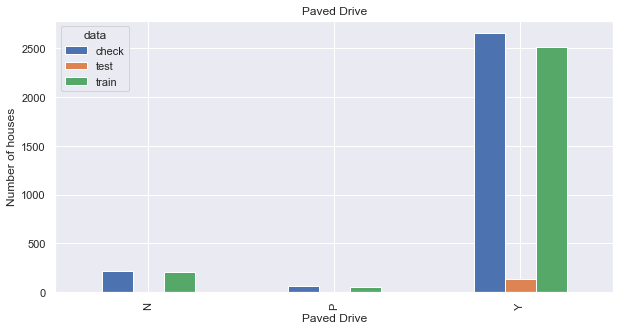

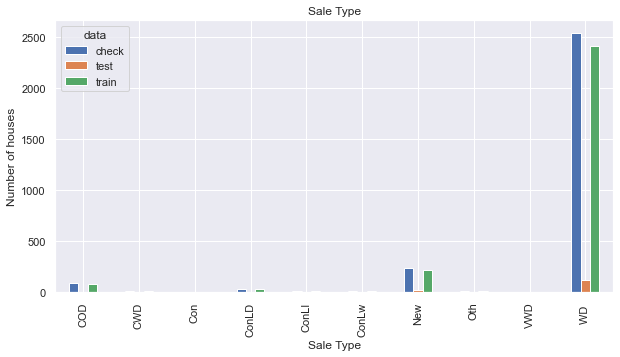

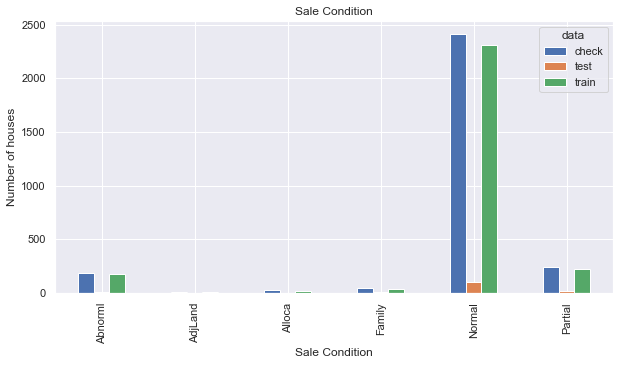

In [ ]:
# plot number of observations / houses per category, per variable

for variable in categorical:
    datas.groupby(variable)['data'].value_counts().unstack().plot.bar(figsize=(10,5))
    plt.title(variable)
    plt.ylabel('Number of houses')
    plt.show()

##### Explanation
We see that pretty much for every variable, some categories are shared by many houses, and some are shown only by very few houses. Then, we wouldn't know if we should trust the Sale Price of houses with these few categories, because we have few houses to learn from.

---
Another problem that comes up with rare categories, is that they may appear only in the train set, or only in the test set, or maybe even only in the submission. So if it appears only in the train set, they may cause over-fitting. But if it appears only on the test set, then the model does not know what to make of that category, and it may crash.


---
I will group infrequent labels together into 1 umbrella category called 'Rare'. But before that, let's have a look at the mean sale price per category, to see if we find some value in any of these variables that we can capitalize.

In [ ]:
# the following function calculates:

# 1) the percentage of houses per category
# 2) the mean SalePrice per category

# and returns a dataframe with those 2 variables

def calculate_mean_target_per_category(df, var):
    
    df = pd.concat([df, y_train], axis=1)
    
    # total number of houses
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [ ]:
# now we use the function for the variable 'Neighborhood'
temp_df = calculate_mean_target_per_category(X_train, 'Neighborhood')

temp_df.head()

Neighborhood  perc_houses  SalePrice
0        NAmes     0.151994  11.862778
1      CollgCr     0.091628  12.180254
2      OldTown     0.084082  11.671515
3      Edwards     0.065397  11.721091
4      Somerst     0.061085  12.317119

In [ ]:
# Now I create a function to plot of the
# category frequency and mean SalePrice.

# This will help us visualise the relationship between the
# target and the labels of the  categorical variable

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()

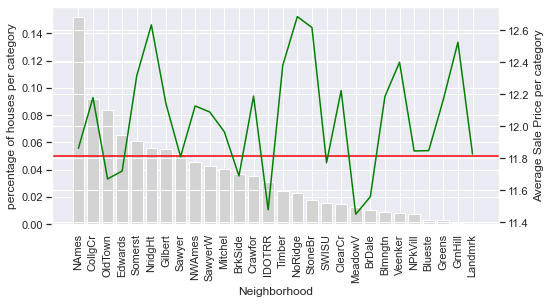

In [ ]:
# plot house count and sale price for Neighbourhood.

plot_categories(temp_df, 'Neighborhood')

**AS can be seen from the data, there are expensive and cheap houses depending on the neighborhood**

In [ ]:
temp_df['SalePrice'].describe()

count    28.000000
mean     12.049344
std       0.351131
min      11.450554
25%      11.801296
50%      12.109059
75%      12.247349
max      12.686337
Name: SalePrice, dtype: float64

**we can say that above the 75% is counted as expensive under 25% is counted as cheap**

In [ ]:
# make a list of the least expensive neighbourhoods

cheap_neighbourhoods = temp_df[temp_df['SalePrice']<11.85]['Neighborhood'].unique()

cheap_neighbourhoods

array(['OldTown', 'Edwards', 'Sawyer', 'BrkSide', 'IDOTRR', 'SWISU',
       'MeadowV', 'BrDale', 'NPkVill', 'Blueste', 'Landmrk'], dtype=object)

In [ ]:
# make a list of the most expensive neighbourhoods

expensive_neighbourhoods = temp_df[temp_df['SalePrice']>12.2]['Neighborhood'].unique()

expensive_neighbourhoods

array(['Somerst', 'NridgHt', 'Timber', 'NoRidge', 'StoneBr', 'ClearCr',
       'Veenker', 'GrnHill'], dtype=object)

In [ ]:
## we are gonna make chep neighborhood to 0, expensive 2 others 1
# new variable that segregates neigbourhoods as per the previous lists

X_train['Neigh_Price'] = np.where(X_train['Neighborhood'].isin(cheap_neighbourhoods),
                                  0, np.where(X_train['Neighborhood'].isin(expensive_neighbourhoods),
                                              2, 1))

X_test['Neigh_Price'] = np.where(X_test['Neighborhood'].isin(cheap_neighbourhoods),
                                  0, np.where(X_test['Neighborhood'].isin(expensive_neighbourhoods),
                                              2, 1))

check['Neigh_Price'] = np.where(check['Neighborhood'].isin(cheap_neighbourhoods),
                                  0, np.where(check['Neighborhood'].isin(expensive_neighbourhoods),
                                              2, 1))

# let's inspect the new variable
X_train['Neigh_Price'].value_counts()

1    1319
0     889
2     575
Name: Neigh_Price, dtype: int64

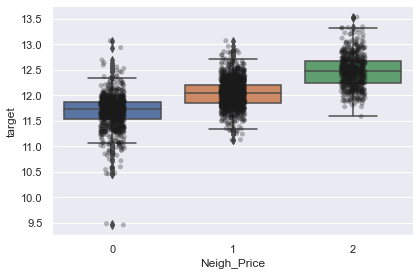

In [ ]:
# let's inspect the value of our new variable

# put data together for analysis
datas = create_master_data(X_train, X_test, check, y_train, y_test)

sns.catplot(x='Neigh_Price', y='target', data=datas[datas['data']=='train'], kind="box", height=4, aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x='Neigh_Price', y='target', data=datas[datas['data']=='train'], jitter=0.1, alpha=0.3, color='k')
plt.show()

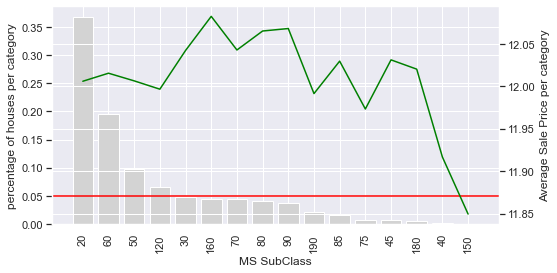

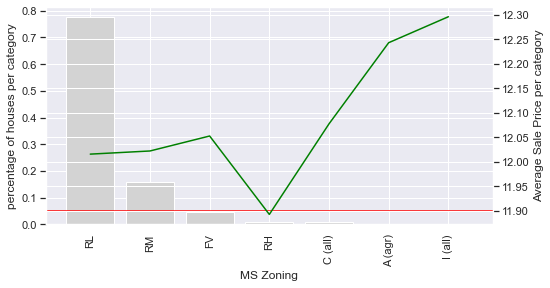

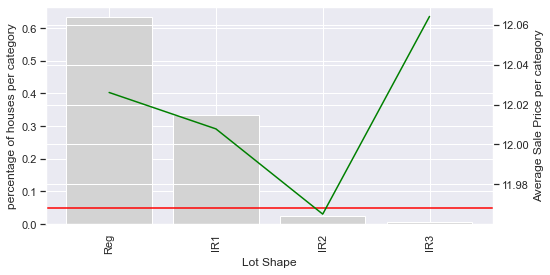

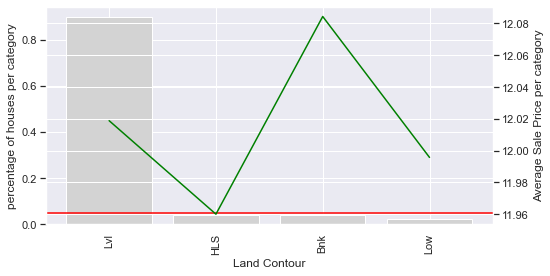

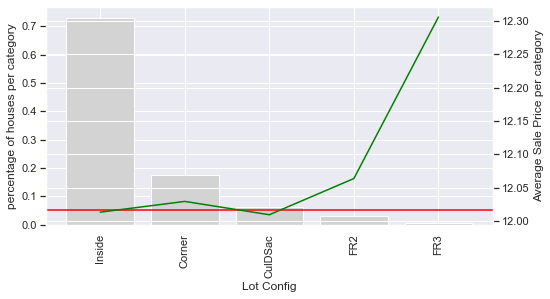

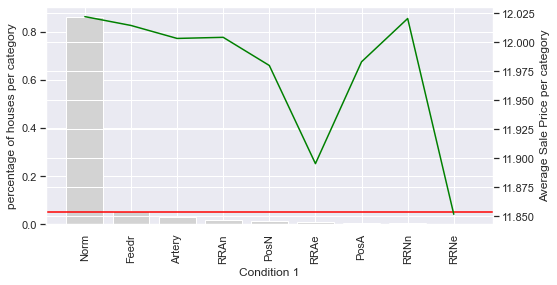

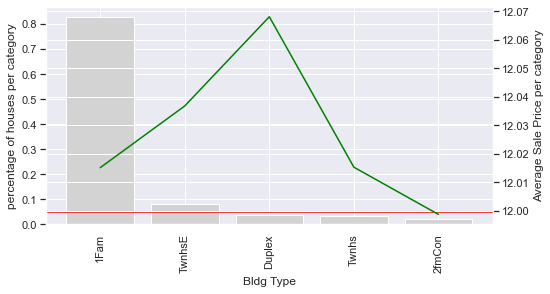

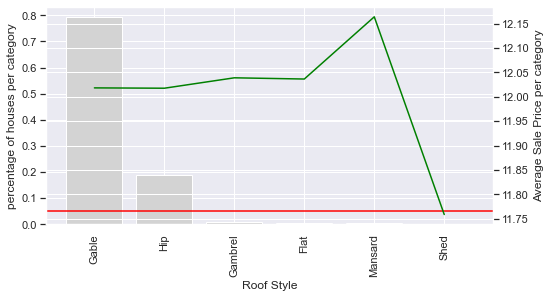

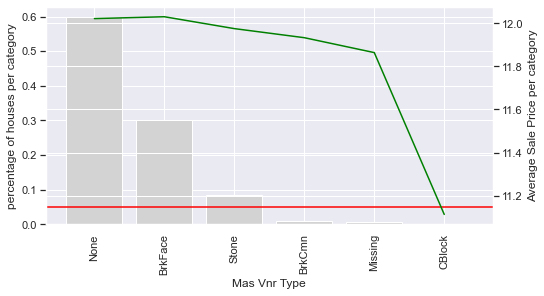

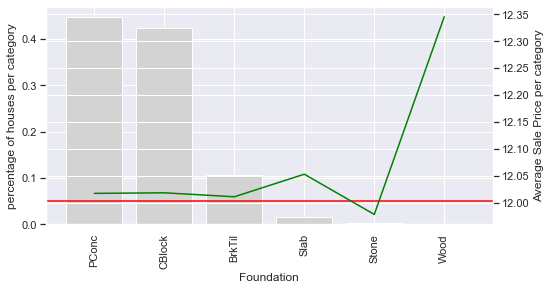

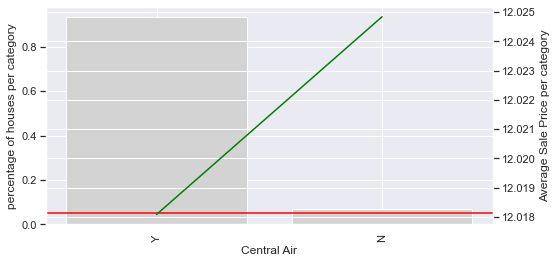

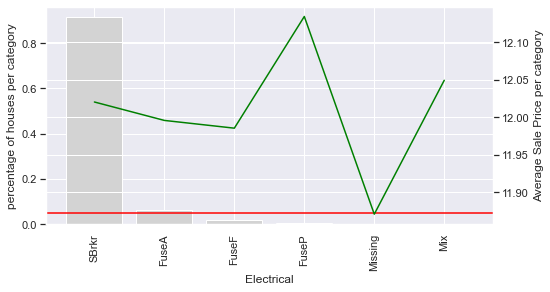

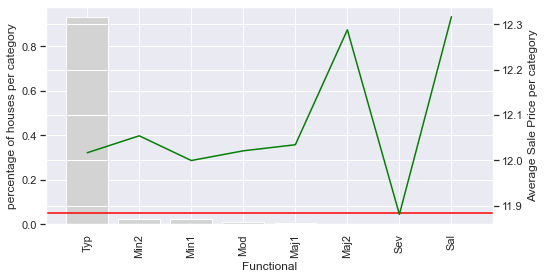

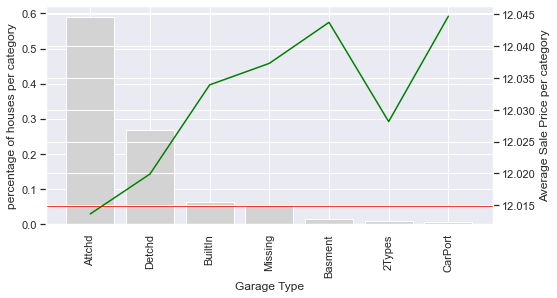

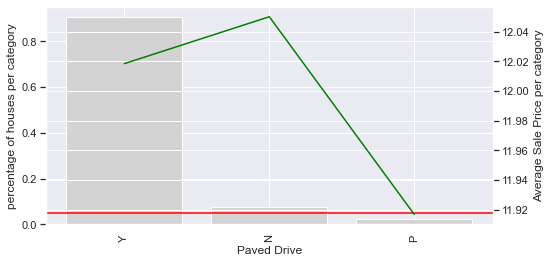

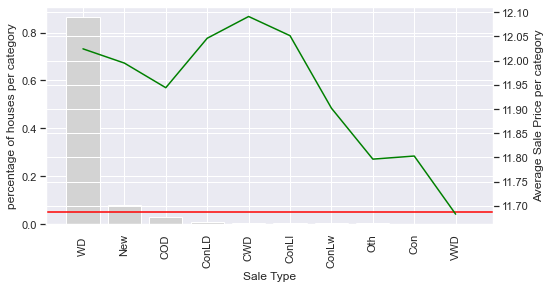

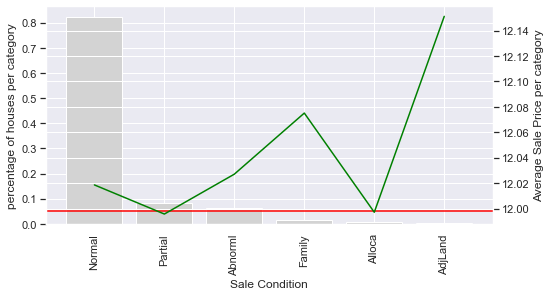

In [ ]:
# let's plot for the remaining categorical variables
# the count of houses per category and the mean sale price

for col in categorical:
    
    # we plotted this variable already
    if col !='Neighborhood':
        
        # re using the functions created
        temp_df = calculate_mean_target_per_category(datas, col)
        plot_categories(temp_df, col)

In [ ]:
# Now I will group infrequent labels together:

# if a category is present in less than 5% of the observations, we group it with other
# infrequent categories (tol param)

rare_enc = enc.RareLabelEncoder(tol = 0.05,
                                n_categories=4, # number of minimum categories per variable for the grouping to proceed
                                variables=categorical
                               )

rare_enc.fit(X_train)

C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\feature_engine\encoding\rare_label.py:157: UserWarning: The number of unique categories for variable Lot Shape is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\feature_engine\encoding\rare_label.py:157: UserWarning: The number of unique categories for variable Land Contour is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\feature_engine\encoding\rare_label.py:157: UserWarning: The number of unique categories for variable Central Air is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\feature_engine\encoding\rare_label.py:157: UserWarning: The number of unique categories for variable Paved Drive is less 

RareLabelEncoder(n_categories=4,
                 variables=['MS SubClass', 'MS Zoning', 'Lot Shape',
                            'Land Contour', 'Lot Config', 'Neighborhood',
                            'Condition 1', 'Bldg Type', 'House Style',
                            'Roof Style', 'Exterior 1st', 'Exterior 2nd',
                            'Mas Vnr Type', 'Foundation', 'Central Air',
                            'Electrical', 'Functional', 'Garage Type',
                            'Paved Drive', 'Sale Type', 'Sale Condition'])

----
The warnings tell me that there are a few categorical variables that I indicated to the variables parameter, that have less than 4 unique categories. So the transformer will not pre-process those.

In [ ]:
X_train = rare_enc.transform(X_train)
X_test = rare_enc.transform(X_test)
check = rare_enc.transform(check)

X_train.shape, X_test.shape, check.shape

((2783, 77), (147, 77), (2930, 77))

In [ ]:
# put data together for analysis

datas = create_master_data(X_train, X_test, check, y_train, y_test)

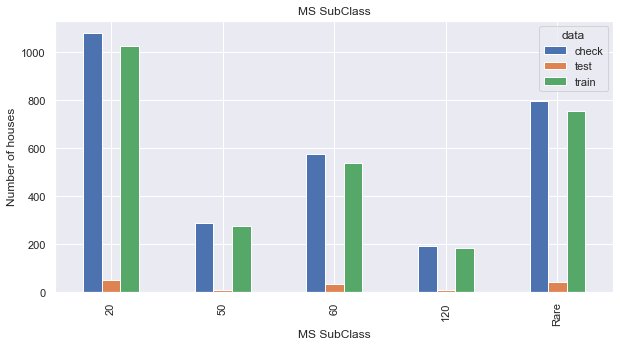

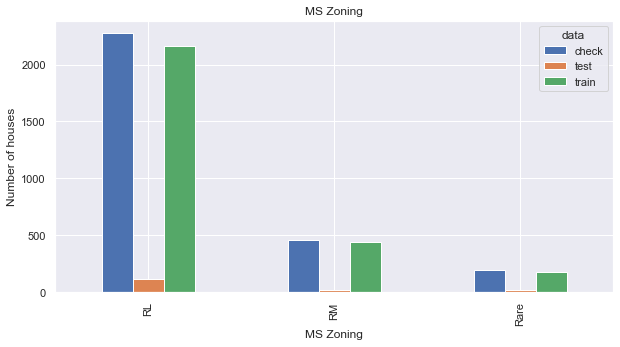

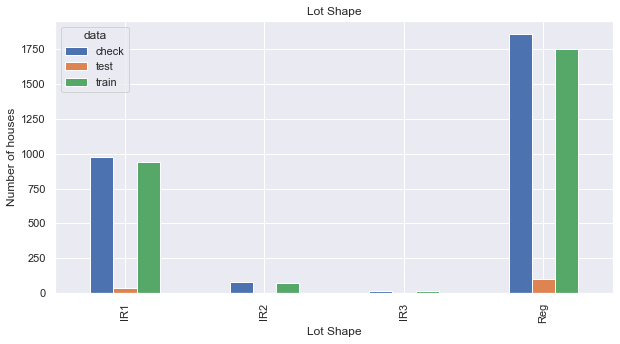

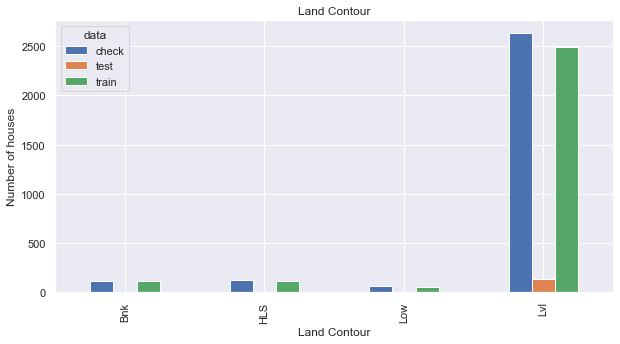

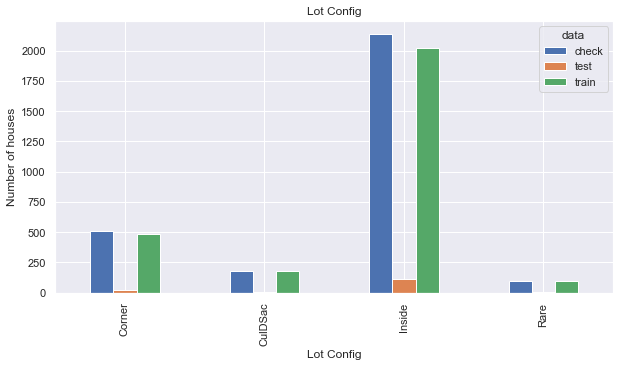

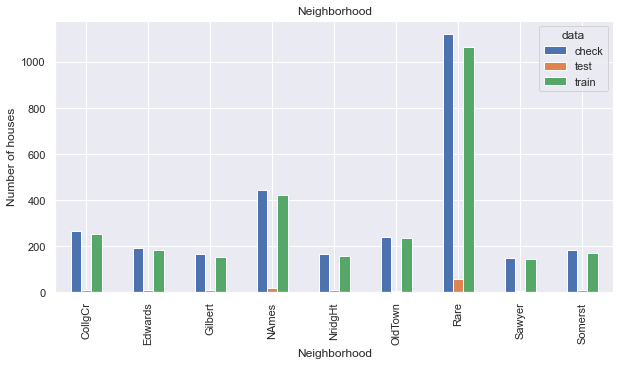

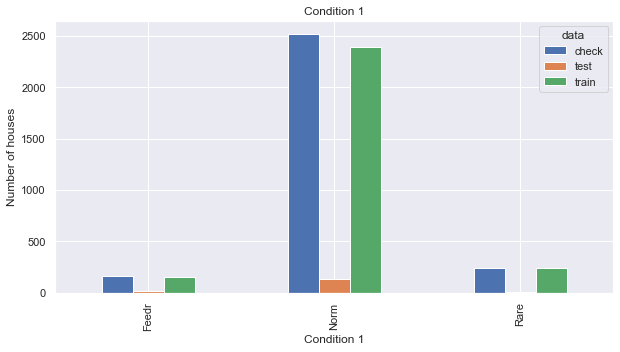

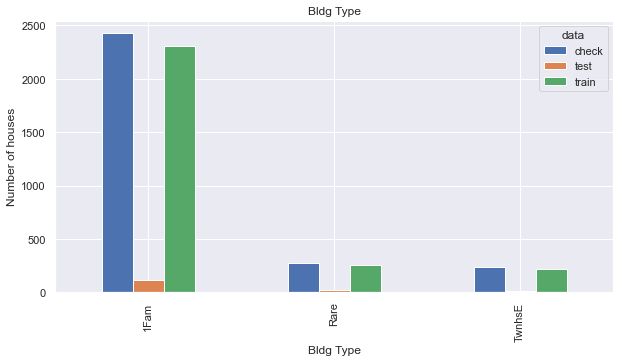

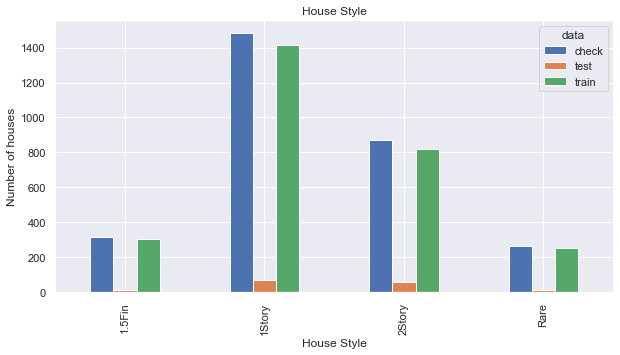

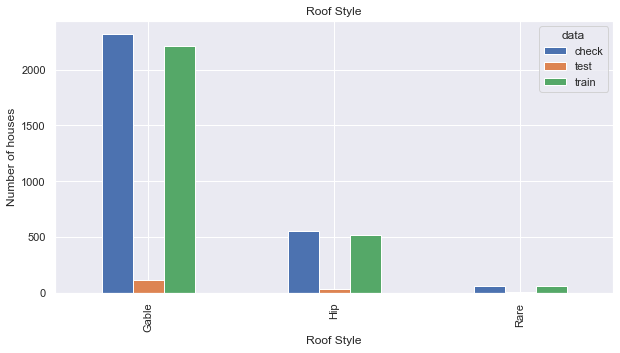

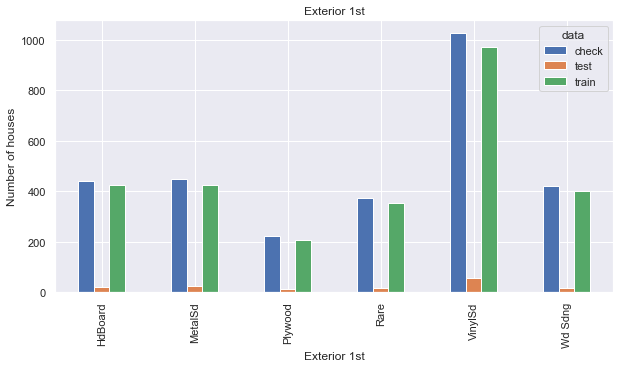

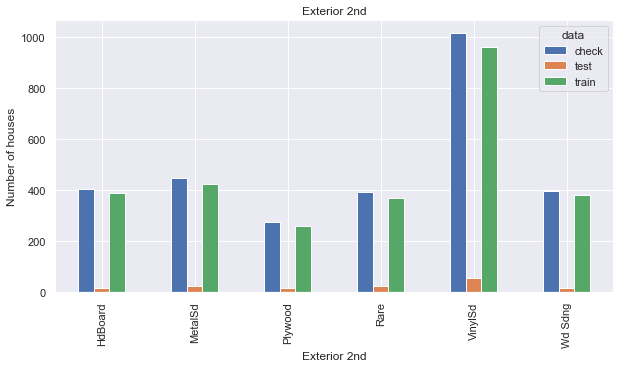

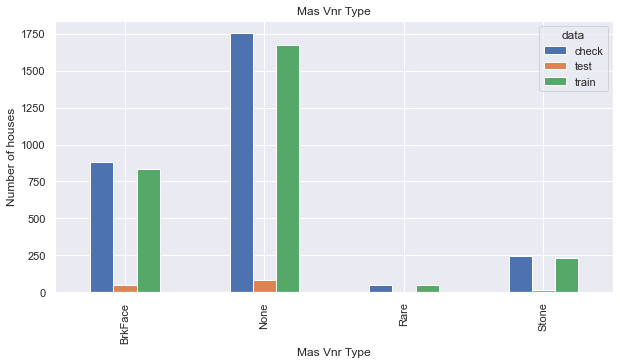

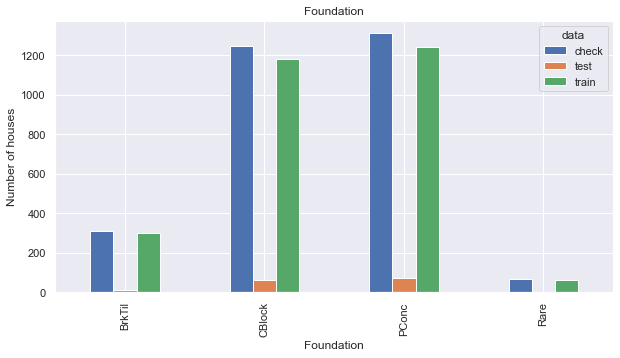

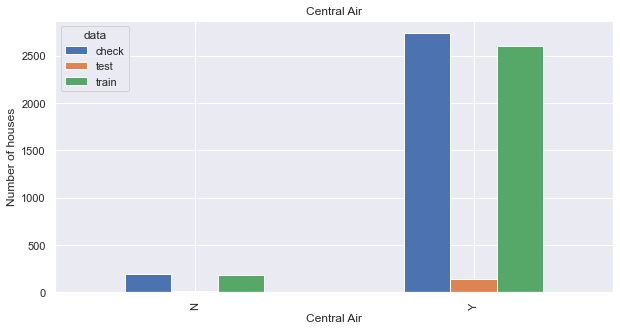

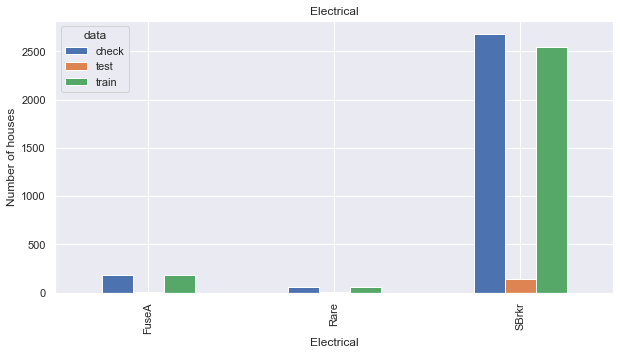

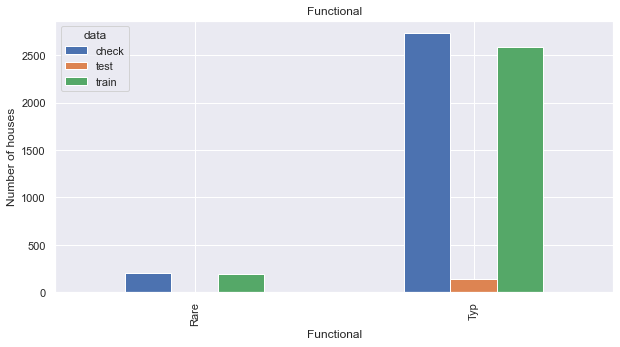

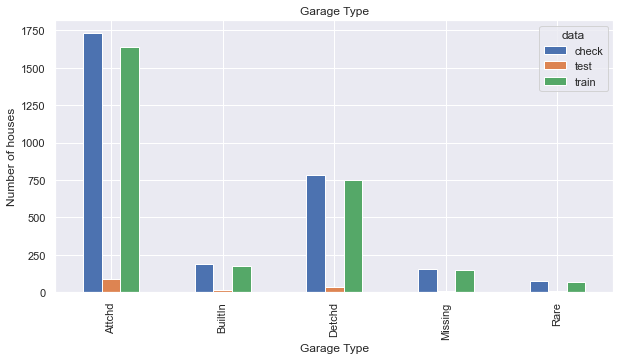

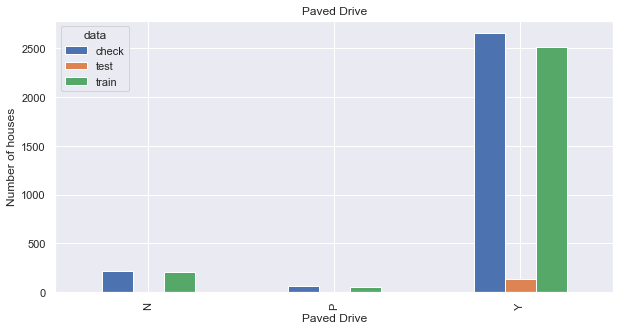

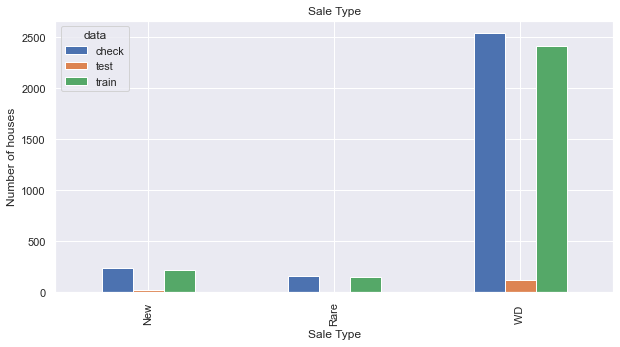

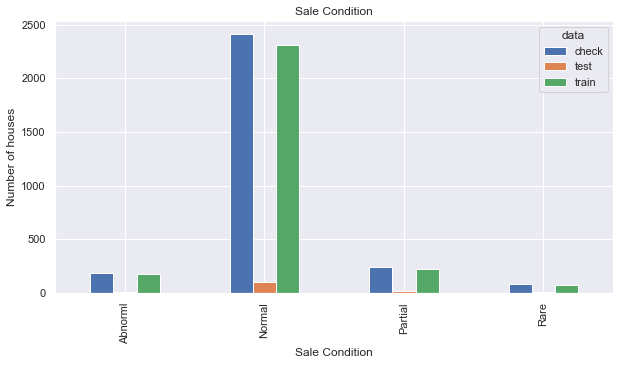

In [ ]:
# now we can plot the variables with grouped categories

for variable in categorical:
    datas.groupby(variable)['data'].value_counts().unstack().plot.bar(figsize=(10,5))
    plt.title(variable)
    plt.ylabel('Number of houses')
    plt.show()

### Categorical variable importance
Let's plot the House Sale Price distribution per category per variable to understand if there is a difference.

Boxplot: indicates the median value of the house, and the interquantal range distance, which contains most of the houses. The rombos above and below are outliers for that distribution.

Jitter: on top of the box plot I plot the houses individually as dots, this gives us an idea of how many houses show that category. More dots, more houses.

If the box plots are at the same height, then the categories or the variable do not show predictive power. But if the show different heights for the different categories, then they might.

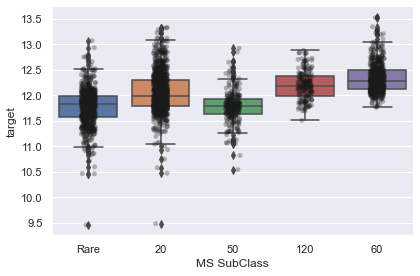

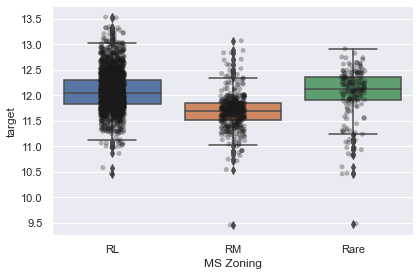

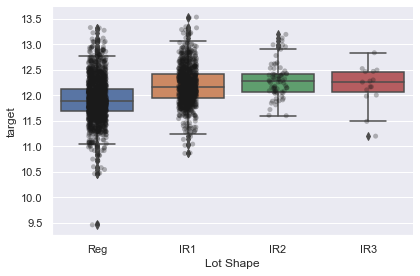

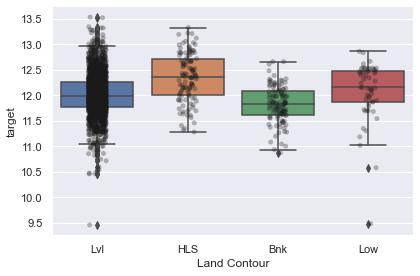

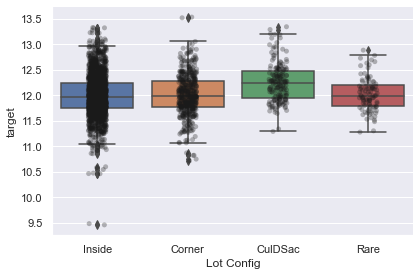

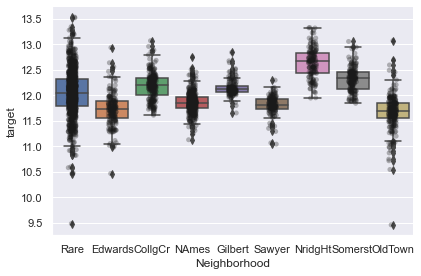

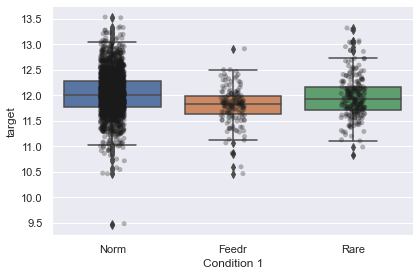

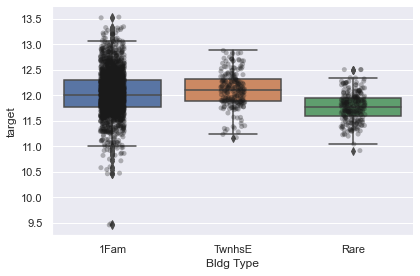

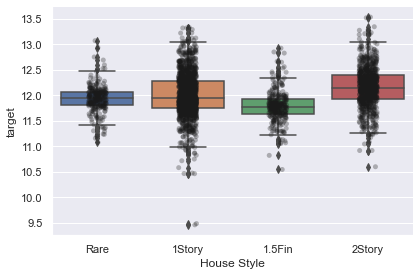

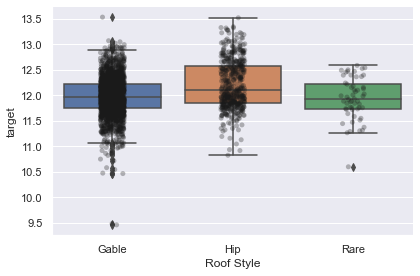

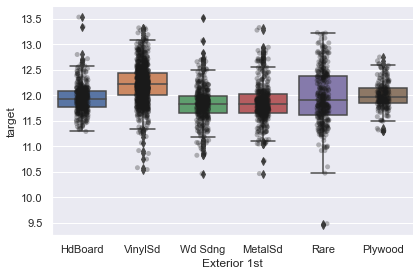

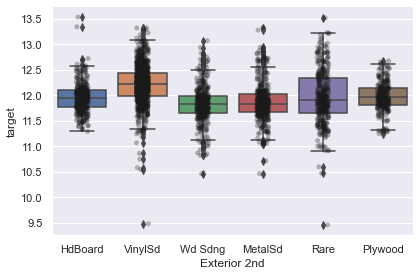

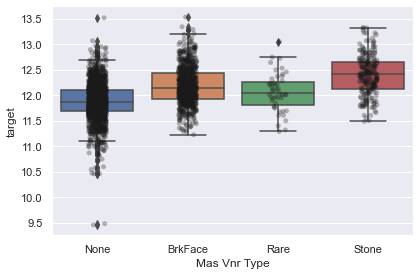

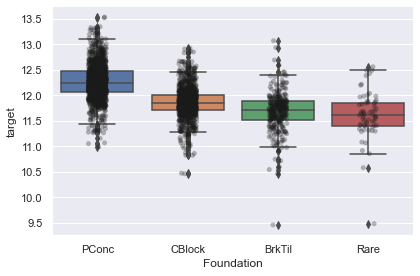

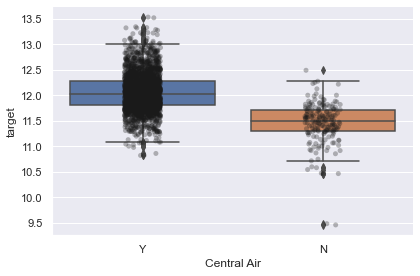

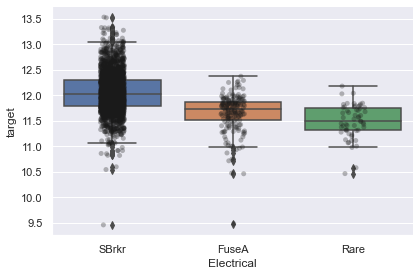

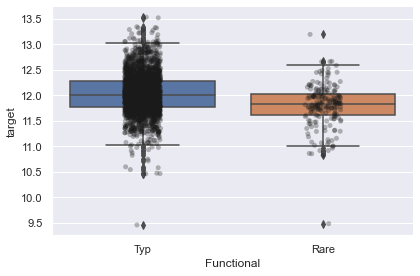

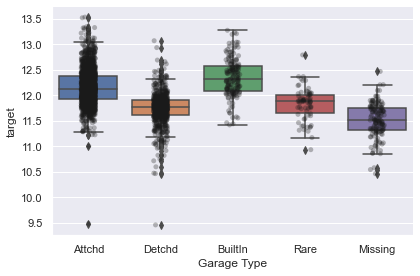

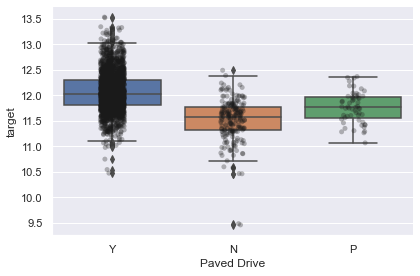

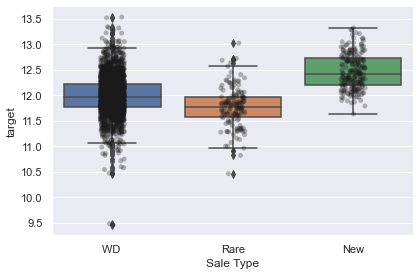

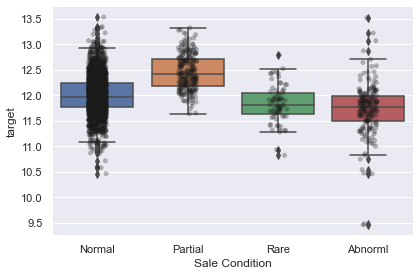

In [ ]:
for variable in categorical:
    # make boxplot with Catplot
    sns.catplot(x=variable, y='target', data=datas[datas['data']=='train'], kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=variable, y='target', data=datas[datas['data']=='train'], jitter=0.1, alpha=0.3, color='k')
    plt.show()

---------

Some categories seem to correlate with higher or lower house sale prices. And some, not at all. See for example the plot for the variable Foundation. The different foundations seem to correlate with lower sale prices. The same is true for the variable SaleCondition and others.

We can try and determine which of the variables are useful using an approach used in the KDD2009 data science competition. The approach consists in replacing the category by the mean of the target. And then using that replacement as a prediction, and evaluate the performance comparing the prediction to the real value of the house price.

We can perform all of this, very easily with a class from Feature-engine.

Check SelectByTargetMeanPerformance for more details

In [ ]:
selector = sel.SelectByTargetMeanPerformance(
    variables=categorical, # the variables to examine
    scoring='r2_score', # the metric to use for the performance evaluation
    threshold=0.1, # the minimum performance threshold for a variable to be selected
    cv=2, # the cross-validation fold
    random_state=0)

# find the variables that are important
selector.fit(X_train, y_train)

SelectByTargetMeanPerformance(cv=2, random_state=0, scoring='r2_score',
                              threshold=0.1,
                              variables=['MS SubClass', 'MS Zoning',
                                         'Lot Shape', 'Land Contour',
                                         'Lot Config', 'Neighborhood',
                                         'Condition 1', 'Bldg Type',
                                         'House Style', 'Roof Style',
                                         'Exterior 1st', 'Exterior 2nd',
                                         'Mas Vnr Type', 'Foundation',
                                         'Central Air', 'Electrical',
                                         'Functional', 'Garage Type',
                                         'Paved Drive', 'Sale Type',
                                         'Sale Condition'])

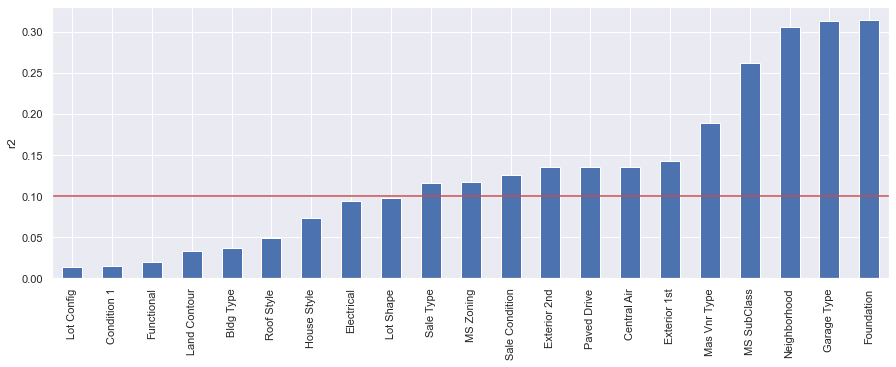

In [ ]:
# in the attribute feature_performance_ the class stores the performance
# of each feature

pd.Series(selector.feature_performance_).sort_values().plot.bar(figsize=(15,5))
plt.ylabel('r2')

# the red line is the threshold we selected.
plt.axhline(y = 0.1, color = 'r', linestyle = '-') 
plt.show()

##### explanation
I selected the threshold somewhat arbitrarily. We can play with this a bit to select more or less variables. If we leave the parameter to None, then the class will select those features which performance is above the mean performance of the group. An S2 of 0.1 indicates that the variable explains 10% of the total variability in the data. So it is not too bad.

In [ ]:
# number of variables to remove

len(selector.features_to_drop_)

9

In [ ]:
# remove non predictive categorical variables

X_train = selector.transform(X_train)
X_test = selector.transform(X_test)
check = selector.transform(check)

X_train.shape, X_test.shape, check.shape

((2783, 68), (147, 68), (2930, 68))

##### encoding cat variables
We are going to assign numbers to the variables, but these numbers will be assigned from smaller to bigger, based on the mean sale price per category.

In [ ]:
# let's identify all remaining categorical variables (remember that we encoded
# some into numbers already)

categorical = [var for var in X_train.columns if X_train[var].dtype == 'O']

# MSSubClass is also categorical by definition, despite its numeric values
categorical = categorical + ['MS SubClass']

# number of categorical variables
len(categorical)

19

In [ ]:
# cast all variables as categorical

X_train[categorical] = X_train[categorical].astype('O')
X_test[categorical] = X_test[categorical].astype('O')
check[categorical] = check[categorical].astype('O')

In [ ]:
# set up the ordinal encoder from Feature-engine

encoder = enc.OrdinalEncoder(encoding_method='ordered',
                             variables=categorical)

encoder.fit(X_train, y_train)

OrdinalEncoder(variables=['MS SubClass', 'MS Zoning', 'Street', 'Utilities',
                          'Land Slope', 'Neighborhood', 'Condition 2',
                          'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
                          'Mas Vnr Type', 'Foundation', 'Heating',
                          'Central Air', 'Garage Type', 'Paved Drive',
                          'Sale Type', 'Sale Condition', 'MS SubClass'])

In [ ]:
# in this attribute we find the numbers that will replace each category in each variable

encoder.encoder_dict_

{'MS SubClass': {'Rare': 0, 50: 1, 20: 2, 120: 3, 60: 4},
 'MS Zoning': {'RM': 0, 'Rare': 1, 'RL': 2},
 'Street': {'Other': 0, 'Pave': 1},
 'Utilities': {'Other': 0, 'AllPub': 1},
 'Land Slope': {'Gtl': 0, 'Other': 1},
 'Neighborhood': {'OldTown': 0,
  'Edwards': 1,
  'Sawyer': 2,
  'NAmes': 3,
  'Rare': 4,
  'Gilbert': 5,
  'CollgCr': 6,
  'Somerst': 7,
  'NridgHt': 8},
 'Condition 2': {'Other': 0, 'Norm': 1},
 'Roof Matl': {'CompShg': 0, 'Other': 1},
 'Exterior 1st': {'Wd Sdng': 0,
  'MetalSd': 1,
  'HdBoard': 2,
  'Rare': 3,
  'Plywood': 4,
  'VinylSd': 5},
 'Exterior 2nd': {'Wd Sdng': 0,
  'MetalSd': 1,
  'HdBoard': 2,
  'Rare': 3,
  'Plywood': 4,
  'VinylSd': 5},
 'Mas Vnr Type': {'None': 0, 'Rare': 1, 'BrkFace': 2, 'Stone': 3},
 'Foundation': {'Rare': 0, 'BrkTil': 1, 'CBlock': 2, 'PConc': 3},
 'Heating': {'Other': 0, 'GasA': 1},
 'Central Air': {'N': 0, 'Y': 1},
 'Garage Type': {'Missing': 0,
  'Detchd': 1,
  'Rare': 2,
  'Attchd': 3,
  'BuiltIn': 4},
 'Paved Drive': {'N': 0, 'P'

In [ ]:
# encode the variables

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
check = encoder.transform(check)

X_train.shape, X_test.shape, check.shape

((2783, 68), (147, 68), (2930, 68))

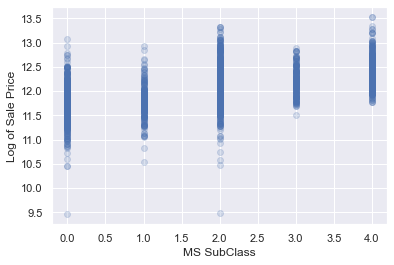

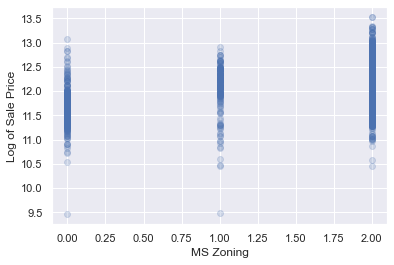

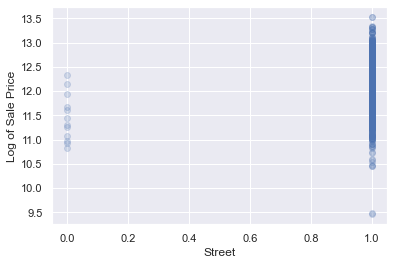

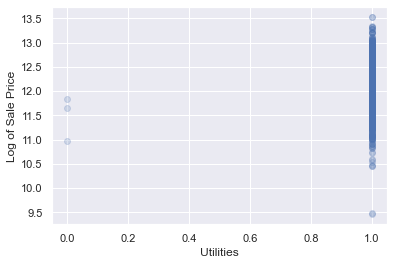

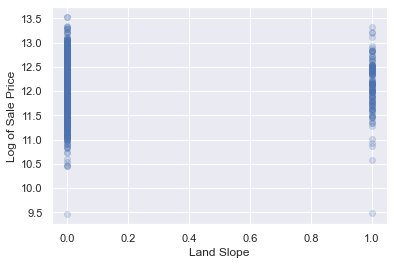

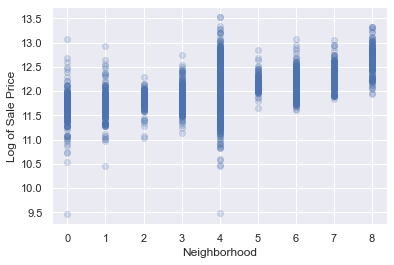

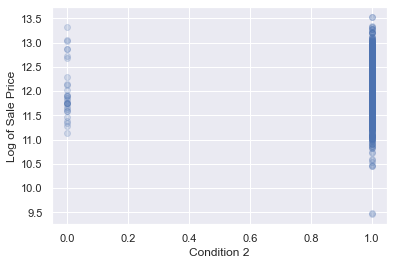

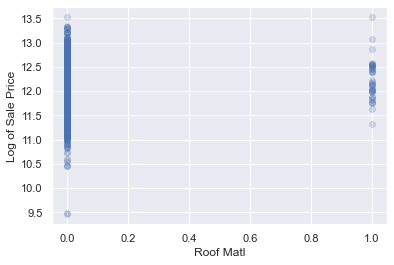

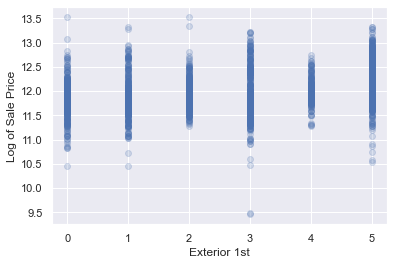

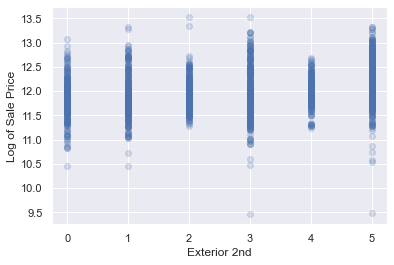

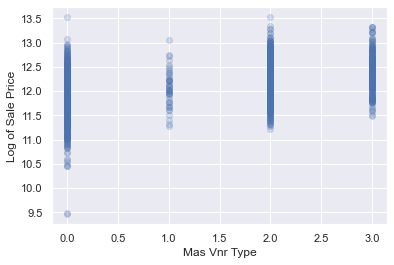

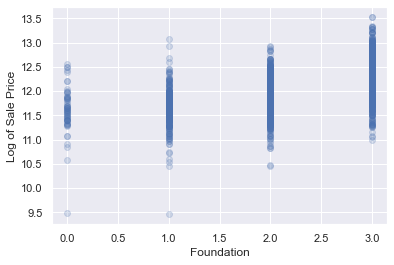

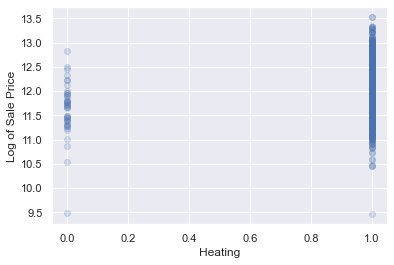

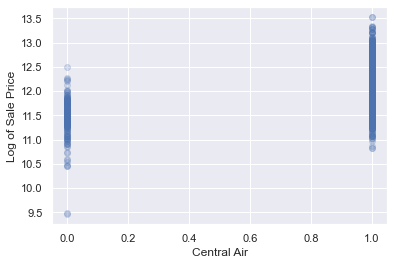

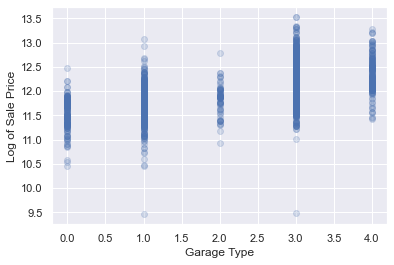

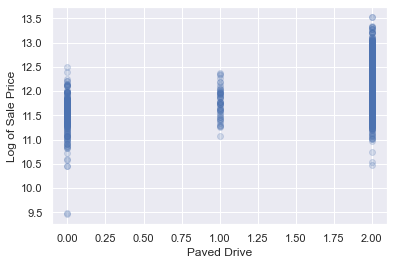

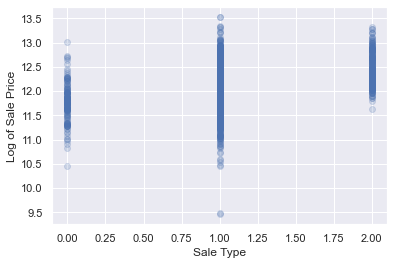

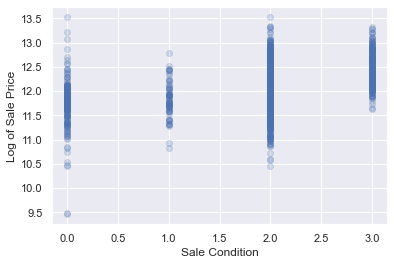

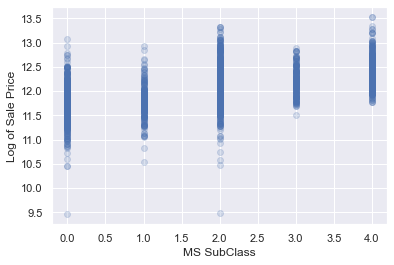

In [ ]:
# Now let's examine the monotonic relationships

for var in categorical:
    plt.scatter(X_train[var], y_train, alpha=0.2)
    plt.ylabel('Log of Sale Price')
    plt.xlabel(var)
    plt.show()

**For some variables, we see an increase in the house price with the encoded variable value.**

In [ ]:
# check that NAN were not introduced during the encoding

[c for c in categorical if X_train[c].isnull().sum()>0]

[]

In [ ]:
# check that NAN were not introduced during the encoding

[c for c in categorical if X_test[c].isnull().sum()>0]

[]

In [ ]:
[c for c in categorical if check[c].isnull().sum()>0]

[]

**time variables**




In [ ]:
year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]

year_vars

['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold']

In [ ]:
year_vars

['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold']

###### plotting sale prive over time

In [ ]:
datas = create_master_data(X_train, X_test, check, y_train, y_test)

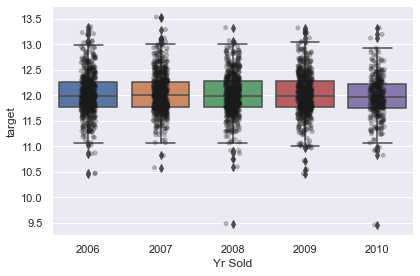

In [ ]:
# make boxplot with Catplot
sns.catplot(x='Yr Sold', y='target', data=datas[datas['data']=='train'], kind="box", height=4, aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x='Yr Sold', y='target', data=datas[datas['data']=='train'], jitter=0.1, alpha=0.3, color='k')
plt.show()

**We see that the sale price seems stable over the years for which we have data.**

Now let's plot the house price vs the last time where something was remodelled in the house. I expect more expensive houses if they were recently remodelled.

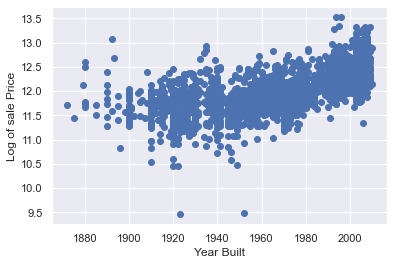

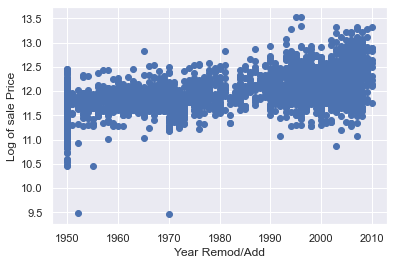

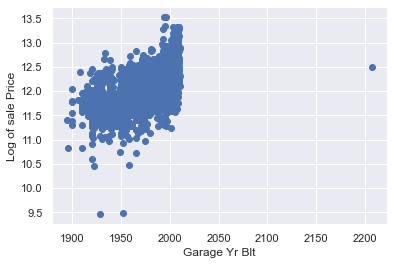

In [ ]:
for variable in ['Year Built', 'Year Remod/Add', 'Garage Yr Blt']:
    plt.scatter(X_train[variable], y_train)
    plt.ylabel('Log of sale Price')
    plt.xlabel(variable)
    plt.show()

**There seems to be a slight linear trend to increase in house prices, for those houses that were remodelled in later years.**

Let's capture the difference between the year in which something was remodelled or built and the sale time.

In [ ]:
# this transformer will substract all the variables in the reference list, from YrSold
# to determine the age of remodelling at point of sale

create = creation.CombineWithReferenceFeature(
    variables_to_combine = ['Yr Sold'],
    reference_variables = ['Year Built', 'Year Remod/Add', 'Garage Yr Blt'],
    operations=['sub'],
     
)

create.fit(X_train)

CombineWithReferenceFeature(reference_variables=['Year Built', 'Year Remod/Add',
                                                 'Garage Yr Blt'],
                            variables_to_combine=['Yr Sold'])

In [ ]:
X_train = create.transform(X_train)
X_test = create.transform(X_test)
check = create.transform(check)

X_train.shape, X_test.shape, check.shape

((2783, 71), (147, 71), (2930, 71))

In [ ]:
X_train.head()

MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  Utilities  \
248             0          2          73.0      9069       1          1   
333             2          2          50.0      6953       1          1   
1334            1          0          50.0      6000       1          1   
298             3          0          35.0      3907       1          1   
791             4          2          50.0      9350       1          1   

      Land Slope  Neighborhood  Condition 2  Overall Qual  ...  Fence  \
248            0             4            1             6  ...      0   
333            0             4            1             5  ...      0   
1334           0             4            1             6  ...      4   
298            1             4            1             8  ...      0   
791            0             1            1             6  ...      0   

      Misc Val  Mo Sold  Yr Sold  Sale Type  Sale Condition  Neigh_Price  \
248          0        4     2010          1               2            1   
333          0        6     2010          0               2            1   
1334         0        7     2008          1               2            0   
298          0        4     2010          1               2            0   
791          0        7     2009          1               2            0   

      Yr Sold_sub_Year Built  Yr Sold_sub_Year Remod/Add  \
248                       18                          18   
333                       39                           6   
1334                      68                          19   
298                       21                          21   
791                       63                          59   

      Yr Sold_sub_Garage Yr Blt  
248                        18.0  
333                        39.0  
1334                       68.0  
298                        21.0  
791                        63.0  

[5 rows x 71 columns]

In [ ]:
# if the variable 'YearRemodAdd' shows the same value as the
# variable 'YearBuilt', that means that the house has not been remodelled

# so let's create a new feature that captures this.

remodelled = creation.CombineWithReferenceFeature(
    variables_to_combine = ['Year Remod/Add'],
    reference_variables = ['Year Built'],
    operations=['sub'],
)

remodelled.fit(X_train)

CombineWithReferenceFeature(reference_variables=['Year Built'],
                            variables_to_combine=['Year Remod/Add'])

In [ ]:
X_train = remodelled.transform(X_train)
X_test = remodelled.transform(X_test)
check = remodelled.transform(check)

X_train.shape, X_test.shape, check.shape

((2783, 72), (147, 72), (2930, 72))

In [ ]:
# we can see the new variable at the right of the dataframe
X_train.head()

MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  Utilities  \
248             0          2          73.0      9069       1          1   
333             2          2          50.0      6953       1          1   
1334            1          0          50.0      6000       1          1   
298             3          0          35.0      3907       1          1   
791             4          2          50.0      9350       1          1   

      Land Slope  Neighborhood  Condition 2  Overall Qual  ...  Misc Val  \
248            0             4            1             6  ...         0   
333            0             4            1             5  ...         0   
1334           0             4            1             6  ...         0   
298            1             4            1             8  ...         0   
791            0             1            1             6  ...         0   

      Mo Sold  Yr Sold  Sale Type  Sale Condition  Neigh_Price  \
248         4     2010          1               2            1   
333         6     2010          0               2            1   
1334        7     2008          1               2            0   
298         4     2010          1               2            0   
791         7     2009          1               2            0   

      Yr Sold_sub_Year Built  Yr Sold_sub_Year Remod/Add  \
248                       18                          18   
333                       39                           6   
1334                      68                          19   
298                       21                          21   
791                       63                          59   

      Yr Sold_sub_Garage Yr Blt  Year Remod/Add_sub_Year Built  
248                        18.0                              0  
333                        39.0                             33  
1334                       68.0                             49  
298                        21.0                              0  
791                        63.0                              4  

[5 rows x 72 columns]

In [ ]:
# now we need to remove the original time features

drop_features = sel.DropFeatures(features_to_drop =['Year Built', 'Year Remod/Add', 'Garage Yr Blt','Yr Sold'])

X_train = drop_features.fit_transform(X_train)
X_test = drop_features.transform(X_test)
check = drop_features.transform(check)

X_train.shape, X_test.shape, check.shape

((2783, 68), (147, 68), (2930, 68))

In [ ]:
# let's check if the variables have missing data

X_train[[
    'Yr Sold_sub_Year Built', 'Yr Sold_sub_Year Remod/Add' ,'Yr Sold_sub_Garage Yr Blt', 'Year Remod/Add_sub_Year Built']
].isnull().mean()

Yr Sold_sub_Year Built           0.000000
Yr Sold_sub_Year Remod/Add       0.000000
Yr Sold_sub_Garage Yr Blt        0.054617
Year Remod/Add_sub_Year Built    0.000000
dtype: float64

In [ ]:
# let's check if the variables have missing data

X_test[[
    'Yr Sold_sub_Year Built', 'Yr Sold_sub_Year Remod/Add' ,'Yr Sold_sub_Garage Yr Blt', 'Year Remod/Add_sub_Year Built']
].isnull().mean()

Yr Sold_sub_Year Built           0.000000
Yr Sold_sub_Year Remod/Add       0.000000
Yr Sold_sub_Garage Yr Blt        0.047619
Year Remod/Add_sub_Year Built    0.000000
dtype: float64

In [ ]:
# let's check if the variables have missing data

check[[
    'Yr Sold_sub_Year Built', 'Yr Sold_sub_Year Remod/Add' ,'Yr Sold_sub_Garage Yr Blt', 'Year Remod/Add_sub_Year Built']
].isnull().mean()

Yr Sold_sub_Year Built           0.000000
Yr Sold_sub_Year Remod/Add       0.000000
Yr Sold_sub_Garage Yr Blt        0.054266
Year Remod/Add_sub_Year Built    0.000000
dtype: float64

**YrSold_sub_GarageYrBlt shows missing data.** I will impute this altogether when I impute numerical variables later on in the notebook.

The final temporal variable is the month in which the house was sold. Let's check if there is some price change depending on the month of the sale.

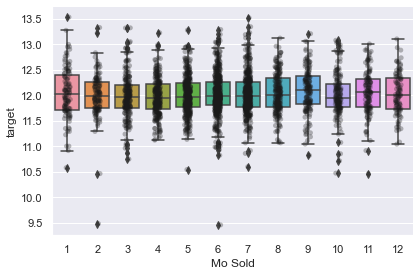

In [ ]:
# make boxplot with Catplot
sns.catplot(x='Mo Sold', y='target', data=datas[datas['data']=='train'], kind="box", height=4, aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x='Mo Sold', y='target', data=datas[datas['data']=='train'], jitter=0.1, alpha=0.3, color='k')
plt.show()

---
The mean house sale price seems similar throughout the months, but there is a difference in the number of houses sold, with less houses sold in Jan and Feb, and more houses sold towards the summer months of the northern hemisphere.

In [ ]:
discrete = [
    var for var in X_train.columns if X_train[var].dtype != 'O'
    and var not in year_vars
    and var not in qual_vars+categorical
    and len(X_train[var].unique()) < 20 
]

# number of discrete variables
len(discrete)

14

**Let's see if there is a relationship between the values of discrete houses and the mean sale price**

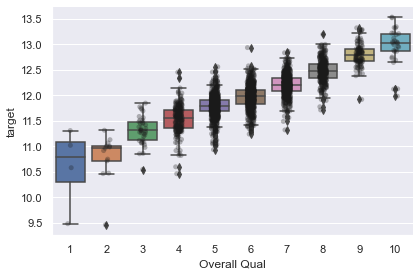

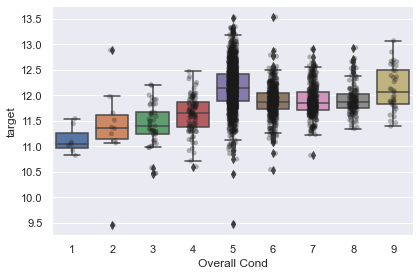

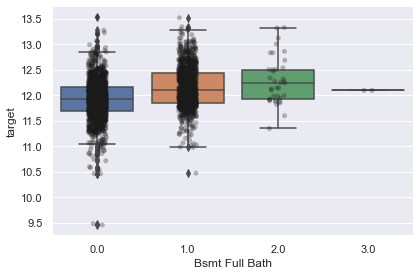

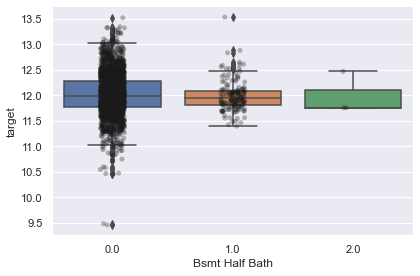

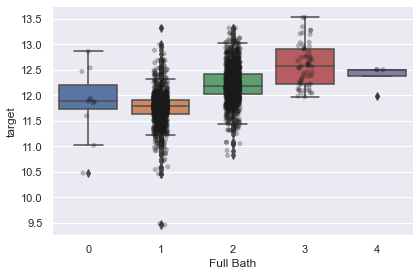

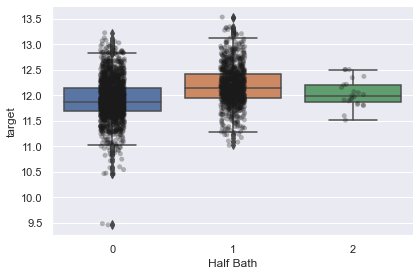

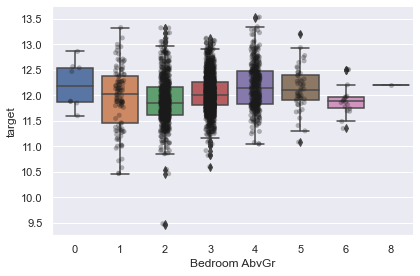

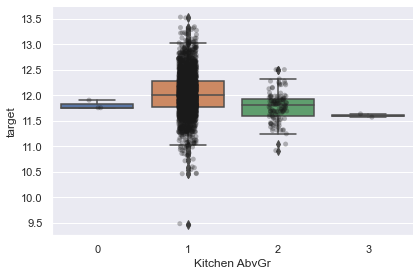

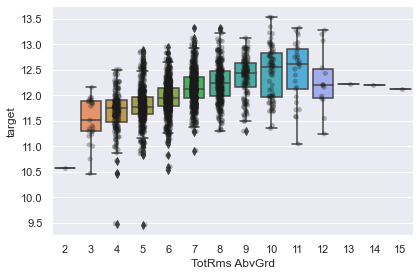

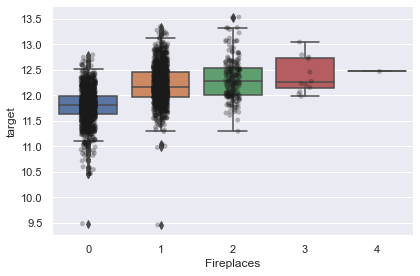

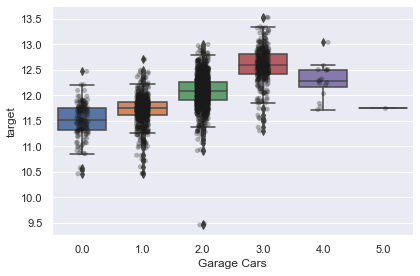

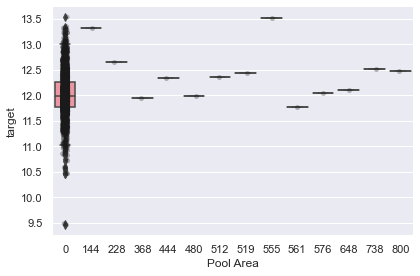

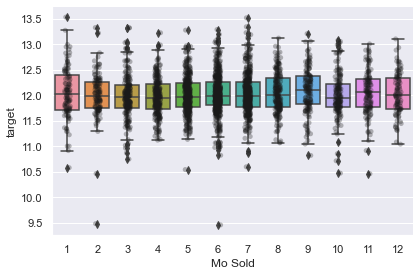

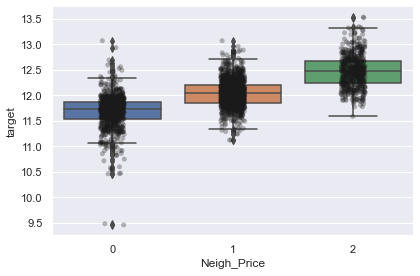

In [ ]:
for var in discrete:
    # make boxplot with Catplot
    sns.catplot(x=var, y='target', data=datas[datas['data']=='train'], kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='target', data=datas[datas['data']=='train'], jitter=0.1, alpha=0.3, color='k')
    plt.show()

**For most of these variables, there is a correlation between the number assigned to the house and the sale price**. Particularly for those variables which values are determined by people, for example OverallQual, or OverallCond. But also for variables like number of bathrooms or rooms.

The only variable that seems to have only 1 value predominantly is PoolArea, so I will remove it from the dataset.

In [ ]:
# remove original feature

drop_features = sel.DropFeatures(features_to_drop =['Pool Area'])

X_train = drop_features.fit_transform(X_train)
X_test = drop_features.transform(X_test)
check = drop_features.transform(check)

X_train.shape, X_test.shape, check.shape

((2783, 67), (147, 67), (2930, 67))

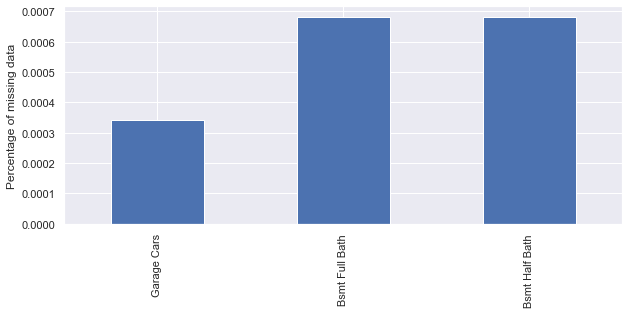

In [ ]:
### Missing data

# let's capture the discrete variables with missing data

null_disc = {var: datas[var].isnull().mean() for var in discrete if datas[var].isnull().mean()>0}

# plot
pd.Series(null_disc).sort_values().plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing data')
plt.show()

In [ ]:
# get variable names

pd.Series(null_disc).sort_values().index

Index(['Garage Cars', 'Bsmt Full Bath', 'Bsmt Half Bath'], dtype='object')

In [ ]:
# There are 3 discrete variables with NA. I will impute these altogether with numerical variables

In [ ]:
numerical = [
    var for var in X_train.columns 
    if var not in categorical + qual_vars + discrete + year_vars
]

len(numerical)

22

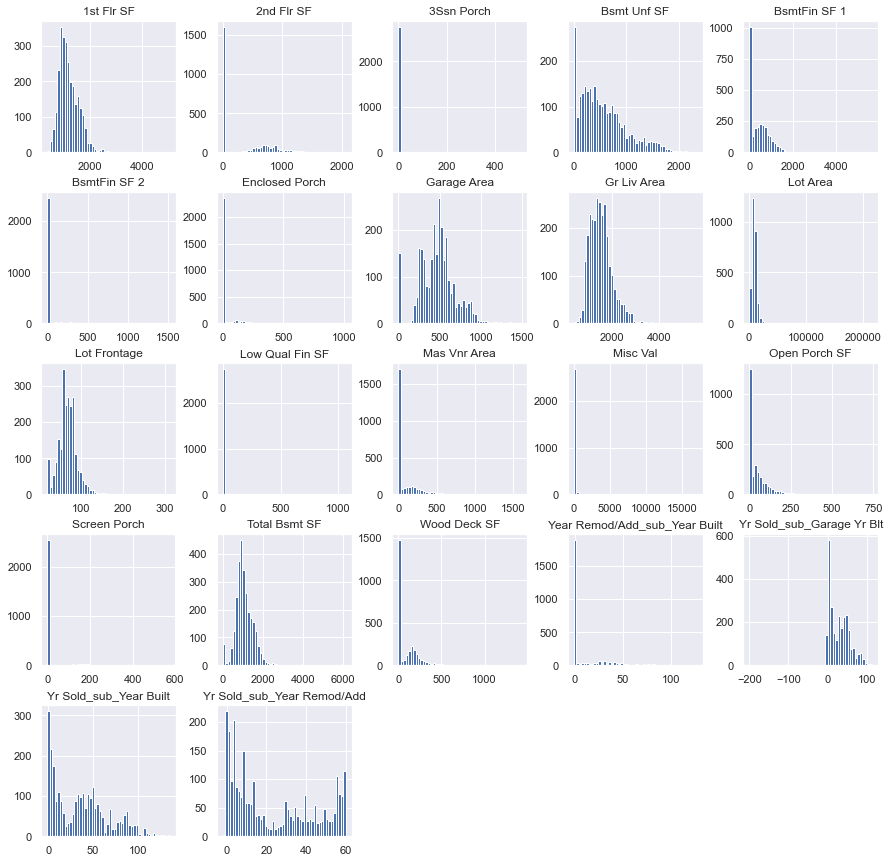

In [ ]:
# let's examine the distribution of the numerical continuous variables

X_train[numerical].hist(bins=50, figsize=(15,15))

plt.show()

**There are some variables that show predominantly 1 value, like Misc Val, Screen Porch, LowQualFinSF.**
* I could remove them with the constant features selector. 
* But I could also let the model decide if they are important or not. So I will do this, this time.

In [ ]:
X_train[numerical].T

248     333     1334    298     791     2259  \
Lot Frontage                     73.0    50.0    50.0    35.0    50.0    67.0   
Lot Area                       9069.0  6953.0  6000.0  3907.0  9350.0  8368.0   
Mas Vnr Area                      0.0     0.0     0.0     0.0     0.0     0.0   
BsmtFin SF 1                    747.0   469.0   521.0   747.0   342.0     0.0   
BsmtFin SF 2                      0.0     0.0     0.0     0.0     0.0     0.0   
Bsmt Unf SF                     189.0   395.0   460.0   235.0   405.0  1689.0   
Total Bsmt SF                   936.0   864.0   981.0   982.0   747.0  1689.0   
1st Flr SF                      996.0   874.0  1014.0  1034.0   892.0  1689.0   
2nd Flr SF                        0.0     0.0   658.0     0.0   747.0     0.0   
Low Qual Fin SF                   0.0     0.0     0.0     0.0     0.0     0.0   
Gr Liv Area                     996.0   874.0  1672.0  1034.0  1639.0  1689.0   
Garage Area                     564.0   352.0   240.0   598.0   240.0   433.0   
Wood Deck SF                    120.0     0.0     0.0   141.0     0.0   100.0   
Open Porch SF                     0.0     0.0    11.0    36.0    50.0    39.0   
Enclosed Porch                    0.0     0.0     0.0     0.0     0.0     0.0   
3Ssn Porch                        0.0     0.0     0.0     0.0     0.0     0.0   
Screen Porch                      0.0     0.0     0.0     0.0     0.0     0.0   
Misc Val                          0.0     0.0     0.0     0.0     0.0     0.0   
Yr Sold_sub_Year Built           18.0    39.0    68.0    21.0    63.0     1.0   
Yr Sold_sub_Year Remod/Add       18.0     6.0    19.0    21.0    59.0     0.0   
Yr Sold_sub_Garage Yr Blt        18.0    39.0    68.0    21.0    63.0     0.0   
Year Remod/Add_sub_Year Built     0.0    33.0    49.0     0.0     4.0     1.0   

                                 2160    2574    935     979   ...     1828  \
Lot Frontage                     70.0    70.0    24.0    21.0  ...      NaN   
Lot Area                       8145.0  8400.0  1300.0  2217.0  ...  17542.0   
Mas Vnr Area                      0.0     0.0     0.0     0.0  ...      0.0   
BsmtFin SF 1                      0.0   623.0   285.0   273.0  ...    125.0   
BsmtFin SF 2                      0.0     0.0     0.0   273.0  ...   1031.0   
Bsmt Unf SF                     738.0   556.0   276.0     0.0  ...     36.0   
Total Bsmt SF                   738.0  1179.0   561.0   546.0  ...   1192.0   
1st Flr SF                      738.0  1364.0   561.0   546.0  ...   1516.0   
2nd Flr SF                      738.0     0.0   668.0   546.0  ...    651.0   
Low Qual Fin SF                   0.0     0.0     0.0     0.0  ...      0.0   
Gr Liv Area                    1476.0  1364.0  1229.0  1092.0  ...   2167.0   
Garage Area                     552.0   331.0   462.0   286.0  ...    518.0   
Wood Deck SF                      0.0     0.0   150.0   238.0  ...    220.0   
Open Porch SF                    35.0    60.0     0.0     0.0  ...     47.0   
Enclosed Porch                    0.0     0.0     0.0     0.0  ...      0.0   
3Ssn Porch                        0.0     0.0     0.0     0.0  ...      0.0   
Screen Porch                      0.0     0.0     0.0     0.0  ...      0.0   
Misc Val                          0.0     0.0     0.0     0.0  ...      0.0   
Yr Sold_sub_Year Built            0.0    49.0    29.0    39.0  ...     33.0   
Yr Sold_sub_Year Remod/Add        0.0    49.0    29.0    39.0  ...      4.0   
Yr Sold_sub_Garage Yr Blt         0.0    49.0    29.0    39.0  ...     33.0   
Year Remod/Add_sub_Year Built     0.0     0.0     0.0     0.0  ...     29.0   

                                  1778     277     1033    1731     763   \
Lot Frontage                      49.0     89.0    60.0    62.0     60.0   
Lot Area                       15256.0  11792.0  9000.0  8857.0  10800.0   
Mas Vnr Area                      84.0      0.0     0.0     0.0      0.0   
BsmtFin SF 1                     929.0      0.0

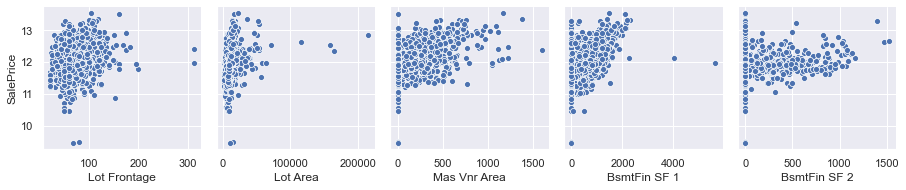

In [ ]:
# let's plot the sale price vs the numerical variables

tmp = pd.concat([X_train, y_train], axis=1)

sns.pairplot(data=tmp,
             y_vars='SalePrice',
             x_vars=['Lot Frontage',
                     'Lot Area',
                     'Mas Vnr Area',
                     'BsmtFin SF 1',
                     'BsmtFin SF 2', ])
plt.show()

---
We se that the higher the value of the variable, the higher the sale price, for most of these variables.

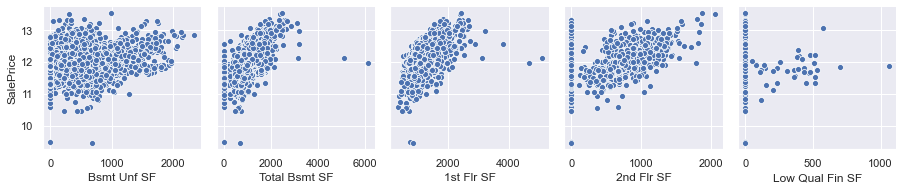

In [ ]:
# let's plot the sale price vs the numerical variables

tmp = pd.concat([X_train, y_train], axis=1)

sns.pairplot(data=tmp,
             y_vars='SalePrice',
             x_vars=['Bsmt Unf SF',
                     'Total Bsmt SF',
                     '1st Flr SF',
                     '2nd Flr SF',
                     'Low Qual Fin SF', ])
plt.show()

---
Same here, the higher the value of the variable, the higher the sale price, in general

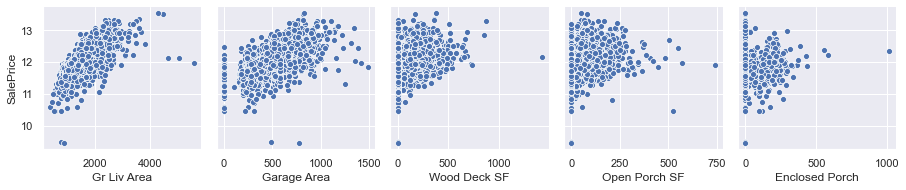

In [ ]:
sns.pairplot(data=tmp,
             y_vars=['SalePrice'],
             x_vars=['Gr Liv Area',
                     'Garage Area',
                     'Wood Deck SF',
                     'Open Porch SF',
                     'Enclosed Porch', ])

plt.show()

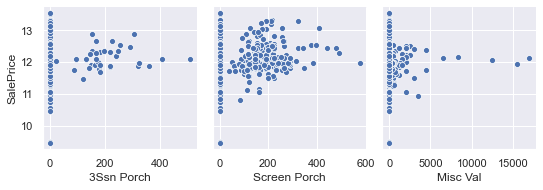

In [ ]:
sns.pairplot(data=tmp,
             y_vars=['SalePrice'],
             x_vars=['3Ssn Porch',
                     'Screen Porch',
                     'Misc Val'])

plt.show()

In [ ]:
#For these variables, there does not seem to be a clear tendency.

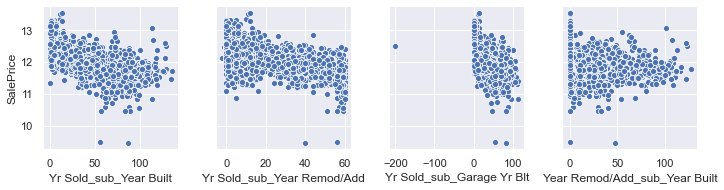

In [ ]:
# and now the time variables we created before

sns.pairplot(data=tmp,
             y_vars=['SalePrice'],
             x_vars=['Yr Sold_sub_Year Built', 
                     'Yr Sold_sub_Year Remod/Add' ,
                     'Yr Sold_sub_Garage Yr Blt',
                     'Year Remod/Add_sub_Year Built'])

plt.show()

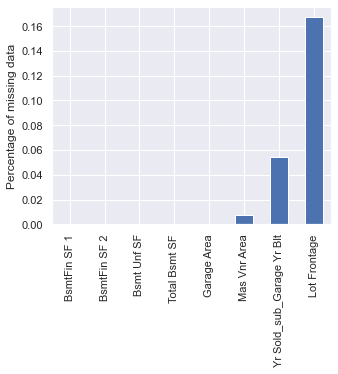

In [ ]:
# concatenate data sources
datas = create_master_data(X_train, X_test, check, y_train, y_test)

# capture numerical variables with NA
null_num = {var: datas[var].isnull().mean() for var in numerical if datas[var].isnull().mean()>0}

# plot
pd.Series(null_num).sort_values().plot.bar(figsize=(5,4))
plt.ylabel('Percentage of missing data')
plt.show()

---
There are a few variables that show missing data.

Let's add a missing indicator first and then impute the missing data with the median value of the variable.

In [ ]:
vars_to_impute = [c for c in null_num.keys()]

# add the discrete variables with NA
vars_to_impute = vars_to_impute + ['Garage Cars', 'Bsmt Full Bath', 'Bsmt Half Bath']

indicator = imp.AddMissingIndicator(missing_only = False,
                                variables = vars_to_impute,
                               )

indicator.fit(X_train)

AddMissingIndicator(missing_only=False,
                    variables=['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1',
                               'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
                               'Garage Area', 'Yr Sold_sub_Garage Yr Blt',
                               'Garage Cars', 'Bsmt Full Bath',
                               'Bsmt Half Bath'])

In [ ]:
# in this attribute we find the variables for which
# the missing indicators will be added

indicator.variables_

['Lot Frontage',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Garage Area',
 'Yr Sold_sub_Garage Yr Blt',
 'Garage Cars',
 'Bsmt Full Bath',
 'Bsmt Half Bath']

In [ ]:
X_train = indicator.transform(X_train)
X_test = indicator.transform(X_test)
check = indicator.transform(check)

X_train.shape, X_test.shape, check.shape

((2783, 78), (147, 78), (2930, 78))

In [ ]:
# now replace NA by the median value

num_imputer = imp.MeanMedianImputer(imputation_method = 'median',
                                    variables = vars_to_impute,
                                   )

num_imputer.fit(X_train)

# the median for imputation for each numerical variable
num_imputer.imputer_dict_

{'Lot Frontage': 68.0,
 'Mas Vnr Area': 0.0,
 'BsmtFin SF 1': 371.5,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 466.0,
 'Total Bsmt SF': 988.0,
 'Garage Area': 480.0,
 'Yr Sold_sub_Garage Yr Blt': 29.0,
 'Garage Cars': 2.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0}

In [ ]:
X_train = num_imputer.transform(X_train)
X_test = num_imputer.transform(X_test)
check = num_imputer.transform(check)

X_train.shape, X_test.shape, check.shape

((2783, 78), (147, 78), (2930, 78))

In [ ]:
X_train.head().T

248     333     1334    298     791 
MS SubClass                       0.0     2.0     1.0     3.0     4.0
MS Zoning                         2.0     2.0     0.0     0.0     2.0
Lot Frontage                     73.0    50.0    50.0    35.0    50.0
Lot Area                       9069.0  6953.0  6000.0  3907.0  9350.0
Street                            1.0     1.0     1.0     1.0     1.0
Utilities                         1.0     1.0     1.0     1.0     1.0
Land Slope                        0.0     0.0     0.0     1.0     0.0
Neighborhood                      4.0     4.0     4.0     4.0     1.0
Condition 2                       1.0     1.0     1.0     1.0     1.0
Overall Qual                      6.0     5.0     6.0     8.0     6.0
Overall Cond                      6.0     7.0     7.0     6.0     7.0
Roof Matl                         0.0     0.0     0.0     0.0     0.0
Exterior 1st                      2.0     5.0     0.0     2.0     1.0
Exterior 2nd                      2.0     5.0     0.0     2.0     1.0
Mas Vnr Type                      0.0     0.0     0.0     0.0     0.0
Mas Vnr Area                      0.0     0.0     0.0     0.0     0.0
Exter Qual                        3.0     3.0     3.0     4.0     3.0
Exter Cond                        3.0     4.0     3.0     3.0     3.0
Foundation                        3.0     2.0     2.0     2.0     2.0
Bsmt Qual                         4.0     3.0     3.0     4.0     3.0
Bsmt Cond                         3.0     3.0     3.0     3.0     3.0
Bsmt Exposure                     3.0     1.0     1.0     4.0     1.0
BsmtFin Type 1                    6.0     5.0     5.0     6.0     4.0
BsmtFin SF 1                    747.0   469.0   521.0   747.0   342.0
BsmtFin Type 2                    1.0     1.0     1.0     1.0     1.0
BsmtFin SF 2                      0.0     0.0     0.0     0.0     0.0
Bsmt Unf SF                     189.0   395.0   460.0   235.0   405.0
Total Bsmt SF                   936.0   864.0   981.0   982.0   747.0
Heating                           1.0     1.0     1.0     1.0     1.0
Heating QC                        5.0     5.0     5.0     4.0     5.0
Central Air                       1.0     1.0     1.0     1.0     1.0
1st Flr SF                      996.0   874.0  1014.0  1034.0   892.0
2nd Flr SF                        0.0     0.0   658.0     0.0   747.0
Low Qual Fin SF                   0.0     0.0     0.0     0.0     0.0
Gr Liv Area                     996.0   874.0  1672.0  1034.0  1639.0
Bsmt Full Bath                    1.0     0.0     0.0     1.0     0.0
Bsmt Half Bath                    0.0     0.0     0.0     0.0     0.0
Full Bath                         1.0     1.0     1.0     1.0     1.0
Half Bath                         0.0     0.0     1.0     0.0     1.0
Bedroom AbvGr                     2.0     3.0     3.0     1.0     3.0
Kitchen AbvGr                     1.0     1.0     1.0     1.0     1.0
Kitchen Qual                      4.0     3.0     4.0     4.0     4.0
TotRms AbvGrd                     5.0     5.0     6.0     4.0     6.0
Fireplaces                        0.0     0.0     1.0     1.0     1.0
Fireplace Qu                      0.0     0.0     4.0     3.0     4.0
Garage Type                       3.0     1.0     1.0     3.0     1.0
Garage Finish                     1.0     1.0     1.0     3.0     1.0
Garage Cars                       2.0     1.0     1.0     2.0     1.0
Garage Area                     564.0   352.0   240.0   598.0   240.0
Garage Qual                       3.0     3.0     3.0     3.0     3.0
Garage Cond                       3.0     3.0     3.0     3.0     3.0
Paved Drive                       2.0     2.0     2.0     2.0     2.0
Wood Deck SF                    120.0     0.0     0.0   141.0     0.0
Open Porch SF                     0.0     0.0    11.0    36.0    50.0
Enclosed Porch                    0.0     0.0     0.0     0.0     0.0
3Ssn Porch                        0.0     0.0     0.0     0.0     0.0
Screen Porch                      0.0     0

In [ ]:
[c for c in X_train.columns if X_train[c].isnull().sum()>0]

[]

In [ ]:
[c for c in X_test.columns if X_test[c].isnull().sum()>0]

[]

In [ ]:
[c for c in check.columns if check[c].isnull().sum()>0]

[]

In [ ]:
# creating sum features
# total number of basement bathrooms
bath_bsmt = creation.MathematicalCombination(
    variables_to_combine=['Bsmt Half Bath', 'Bsmt Full Bath'],
    math_operations=['sum'],
    new_variables_names=['BsmtBath_total'],
)

# total number of bathrooms
bath_ground = creation.MathematicalCombination(
    variables_to_combine=['Full Bath', 'Half Bath'],
    math_operations=['sum'],
    new_variables_names=['Bath_total'],
)

X_train = bath_bsmt.fit_transform(X_train)
X_test = bath_bsmt.transform(X_test)
check = bath_bsmt.transform(check)

X_train = bath_ground.fit_transform(X_train)
X_test = bath_ground.transform(X_test)
check  = bath_ground.transform(check )

X_train.shape, X_test.shape, check.shape

((2783, 80), (147, 80), (2930, 80))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#def rmse(ytrue, ypredicted):
  #  return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
# let's get the predictions

X_train_preds = lr.predict(X_train)
X_test_preds = lr.predict(X_test)
linearRegression_mse = mean_squared_error(y_test, X_test_preds, squared=False)

In [ ]:
print("lr.coef_: {}".format(lr.coef_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


lr.coef_: [ 7.21089582e-03  2.67482215e-02  8.11750383e-05  1.82226809e-06
  1.43855952e-01  1.27087413e-01  2.38721669e-02  4.14058739e-03
  2.95083026e-02  7.06288362e-02  3.99740303e-02 -4.12928487e-02
  8.50633035e-03 -8.33599816e-03 -3.71159887e-03  4.53249610e-07
  1.31970175e-02  1.21826310e-02  1.77635640e-02  2.02641695e-02
 -1.03415616e-03  1.69276787e-02  7.44371873e-03  3.60618646e-04
 -7.40262348e-03  3.85828044e-04  3.34371635e-04 -3.21355185e-04
 -5.81029103e-03  1.71933260e-02  4.98536989e-02  1.12770745e-04
  3.89437084e-05 -2.12002122e-05  1.30514242e-04  1.95526213e-02
 -9.66426123e-03  1.21536911e-02 -3.90573350e-03  9.49509559e-03
 -2.34052550e-02  2.38970894e-02  8.21838819e-03  1.13230035e-02
  9.03202911e-03 -2.66033809e-03  3.25270767e-03  4.36441949e-02
  2.98716514e-06  2.85949510e-03  5.49273792e-02  2.22407476e-02
  4.79511477e-05 -4.43605291e-06  1.89283115e-04  1.66770603e-04
  2.99812114e-04  1.49943144e-03 -2.73673039e-05 -6.62487277e-04
 -5.09442103e-0

In [ ]:
print('Train rmse: ', mean_squared_error(y_train, X_train_preds, squared=False))
print('Test rmse: ', mean_squared_error(y_test, X_test_preds, squared=False))

Train rmse:  0.13159955724087324
Test rmse:  0.10208061165643553


In [ ]:
print('Train r2: ', r2_score(y_train, X_train_preds))
print('Test r2: ', r2_score(y_test, X_test_preds))

Train r2:  0.8957872286615515
Test r2:  0.9355530915907324


Linear Regression Results:
* LINEAR-MSE:
* TRAIN-SCORE:0.89
* TEST-SCORE: 0.93

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
Modified_X_train = poly.fit_transform(X_train)
Modified_X_test = poly.fit_transform(X_test)

In [ ]:
lr.fit(Modified_X_train,y_train)
print ('The RMSE of the Trainining data for model of degree 2 is :',(mean_squared_error(y_train,lr.predict(Modified_X_train))))
print ('The RMSE of the Testing data for model of degree 2 is :',(mean_squared_error(y_test,lr.predict(Modified_X_test))))

The RMSE of the Trainining data for model of degree 2 is : 0.0015882442408795777
The RMSE of the Testing data for model of degree 2 is : 6.895122370628041


['Kaynak'](https://github.com/asifraza-sonu/Polynomial-regression-Ridge-regression-Lasso-Regression/blob/master/2018AIML551_poly_part_d.py)

In [ ]:
print('Train r2: ', r2_score(y_train, lr.predict(Modified_X_train)))
print('Test r2: ', r2_score(y_test, lr.predict(Modified_X_test)))

Train r2:  0.990442828523857
Test r2:  -41.64396119844928


#### STANDARDSCALER WITH LINERA REGRESSION'

In [ ]:
#X_train_s = s.fit_transform(X_train)

In [ ]:
# lr= LinearRegression().fit(X_train_s, y_train)

In [ ]:
#X_test_s = s.transform(X_test)

In [ ]:
# let's get the predictions

#X_train_preds_s = lr.predict(X_train_s)
#X_test_preds_s= lr.predict(X_test_s)

In [ ]:
#print('Train r2: ', r2_score(y_train, X_train_preds_s))
#print('Test r2: ', r2_score(y_test, X_test_preds_s))

In [ ]:
pf = PolynomialFeatures(degree=2)

scores = []
scores_train = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    ridreg = Ridge(alpha=alpha, max_iter=100000).fit(Modified_X_train,y_train)
    
    ridg_Reg_Train_MSE = mean_squared_error(y_train,ridreg.predict(Modified_X_train))
    ridg_Reg_Test_MSE = mean_squared_error(y_test,ridreg.predict(Modified_X_test))
    
    print('Train MSE of ridge regression of model of degree 2 is :',ridg_Reg_Train_MSE)
    print('Test MSE of ridge regression of model of degree 2 is :',ridg_Reg_Test_MSE)
    X_train_preds_s = ridreg.predict(Modified_X_train)
    predictions= ridreg.predict(Modified_X_test)
    score_train= r2_score(y_train, X_train_preds_s)
    score = r2_score(y_test, predictions)
    
    scores.append(score)
    scores_train.append(score_train)

C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.00838490469942719
Test MSE of ridge regression of model of degree 2 is : 0.018731503105443557


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008409975756510462
Test MSE of ridge regression of model of degree 2 is : 0.01871217462810099


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008373943640018514
Test MSE of ridge regression of model of degree 2 is : 0.01893348886970252


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.00837437472674226
Test MSE of ridge regression of model of degree 2 is : 0.01893824894530428


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.00830712138435431
Test MSE of ridge regression of model of degree 2 is : 0.018828115783084513


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008336705946105331
Test MSE of ridge regression of model of degree 2 is : 0.018944737567164686


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008346711602784029
Test MSE of ridge regression of model of degree 2 is : 0.018616923107517034


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008378354848659857
Test MSE of ridge regression of model of degree 2 is : 0.018705749949690435


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008391716720028768
Test MSE of ridge regression of model of degree 2 is : 0.01757700862343336


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008262363007814815
Test MSE of ridge regression of model of degree 2 is : 0.017527112834011645


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008329932238712577
Test MSE of ridge regression of model of degree 2 is : 0.01774263796821209


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008387543593978499
Test MSE of ridge regression of model of degree 2 is : 0.01746122935055818


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008394766348064065
Test MSE of ridge regression of model of degree 2 is : 0.01752911922315888


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.00827140073031782
Test MSE of ridge regression of model of degree 2 is : 0.017821967209853126


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.00838522634158322
Test MSE of ridge regression of model of degree 2 is : 0.018564134689210643


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.00832667083674501
Test MSE of ridge regression of model of degree 2 is : 0.018668769289518224


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008285802273590048
Test MSE of ridge regression of model of degree 2 is : 0.0176995207164018


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008379976718674955
Test MSE of ridge regression of model of degree 2 is : 0.017465858285660725


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008413463037189234
Test MSE of ridge regression of model of degree 2 is : 0.018620444794911845


C:\Users\Yasin\anaconda3\envs\ibm\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Train MSE of ridge regression of model of degree 2 is : 0.008276600184263105
Test MSE of ridge regression of model of degree 2 is : 0.018665081439468937


In [ ]:
np.mean(scores)

0.8868969168205656

In [ ]:
np.mean(scores_train)

0.9497490572264196

In [ ]:


scores = []
scores_train = []
alphas = np.geomspace(0.0001, 6.0, 100)
for alpha in alphas:
    ridreg = Ridge(alpha=alpha, max_iter=100000).fit(X_train,y_train)
    
    ridg_Reg_Train_MSE = mean_squared_error(y_train,ridreg.predict(X_train))
    ridg_Reg_Test_MSE = mean_squared_error(y_test,ridreg.predict(X_test))
    
    print('Train MSE of ridge regression of model  is :',ridg_Reg_Train_MSE)
    print('Test MSE of ridge regression of model is :',ridg_Reg_Test_MSE)
    X_train_preds_s = ridreg.predict(X_train)
    predictions= ridreg.predict(X_test)
    score_train= r2_score(y_train, X_train_preds_s)
    score = r2_score(y_test, predictions)
    
    scores.append(score)
    scores_train.append(score_train)

Train MSE of ridge regression of model  is : 0.01731844346604047
Test MSE of ridge regression of model is : 0.010420448552658099
Train MSE of ridge regression of model  is : 0.017318443466052064
Test MSE of ridge regression of model is : 0.010420448232543143
Train MSE of ridge regression of model  is : 0.017318443466066546
Test MSE of ridge regression of model is : 0.010420447874803918
Train MSE of ridge regression of model  is : 0.017318443466084642
Test MSE of ridge regression of model is : 0.010420447475019195
Train MSE of ridge regression of model  is : 0.017318443466107232
Test MSE of ridge regression of model is : 0.010420447028247638
Train MSE of ridge regression of model  is : 0.017318443466135442
Test MSE of ridge regression of model is : 0.010420446528967236
Train MSE of ridge regression of model  is : 0.017318443466170678
Test MSE of ridge regression of model is : 0.010420445971007886
Train MSE of ridge regression of model  is : 0.017318443466214695
Test MSE of ridge regress

Train MSE of ridge regression of model  is : 0.017318544149076888
Test MSE of ridge regression of model is : 0.010416488746069388
Train MSE of ridge regression of model  is : 0.017318568036867064
Test MSE of ridge regression of model is : 0.010416048888032027
Train MSE of ridge regression of model  is : 0.017318597438804453
Test MSE of ridge regression of model is : 0.010415563291444533
Train MSE of ridge regression of model  is : 0.017318633573115517
Test MSE of ridge regression of model is : 0.010415027889823689
Train MSE of ridge regression of model  is : 0.01731867790838873
Test MSE of ridge regression of model is : 0.010414438404317897
Train MSE of ridge regression of model  is : 0.017318732208866837
Test MSE of ridge regression of model is : 0.0104137903651658
Train MSE of ridge regression of model  is : 0.01731879858602684
Test MSE of ridge regression of model is : 0.010413079141370326
Train MSE of ridge regression of model  is : 0.01731887955676714
Test MSE of ridge regression 

In [ ]:
np.mean(scores)

0.935606988037706

In [ ]:
np.mean(scores_train)

0.8957714048274066

In [ ]:
np.mean(ridg_Reg_Test_MSE)

0.010358553302075713

In [ ]:
#pf = PolynomialFeatures(degree=2)

scores = []
scores_train = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    les = Lasso (alpha=alpha, max_iter=10000).fit(X_train,y_train)
    
    Lasso_Reg_Train_MSE = mean_squared_error(y_train,les.predict(X_train))
    Lasso_Reg_Test_MSE = mean_squared_error(y_test,les.predict(X_test))
    
    print('Train MSE of Lasso regression of model of degree 2 is :',Lasso_Reg_Train_MSE)
    print('Test MSE of Lasso regression of model of degree 2 is :',Lasso_Reg_Test_MSE)
    X_train_preds_s = les.predict(X_train)
    predictions= les.predict(X_test)
    score_train= r2_score(y_train, X_train_preds_s)
    score = r2_score(y_test, predictions)
    print(np.mean(Lasso_Reg_Test_MSE))
    scores.append(score)
    scores_train.append(score_train)

Train MSE of Lasso regression of model of degree 2 is : 0.030034826348697453
Test MSE of Lasso regression of model of degree 2 is : 0.013380181865696613
0.013380181865696613
Train MSE of Lasso regression of model of degree 2 is : 0.03322128568017389
Test MSE of Lasso regression of model of degree 2 is : 0.014853831240441234
0.014853831240441234
Train MSE of Lasso regression of model of degree 2 is : 0.03446246199534886
Test MSE of Lasso regression of model of degree 2 is : 0.015387063395452875
0.015387063395452875
Train MSE of Lasso regression of model of degree 2 is : 0.034501408459326935
Test MSE of Lasso regression of model of degree 2 is : 0.01536442090148945
0.01536442090148945
Train MSE of Lasso regression of model of degree 2 is : 0.034563323130883575
Test MSE of Lasso regression of model of degree 2 is : 0.015347222652504171
0.015347222652504171
Train MSE of Lasso regression of model of degree 2 is : 0.03463973753774933
Test MSE of Lasso regression of model of degree 2 is : 0.0

In [ ]:
np.mean(scores)

0.8740538522137319

In [ ]:
np.mean(scores_train)

0.7599635952718489

In [ ]:
np.mean(Lasso_Reg_Test_MSE)

0.035517222236671725

In [ ]:
from sklearn.linear_model import RidgeCV
alphas = np.geomspace(0.06, 6.0, 20)
#alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, store_cv_values=True
                  ).fit(X_train, y_train)


X_train_predis = ridgeCV.predict(X_train)
score_train= r2_score(y_train, ridgeCV.predict(X_train))
ypred = ridgeCV.predict(X_test)
score = ridgeCV.score(X_test,y_test)

ridgeCV_mse =  mean_squared_error(y_test, ridgeCV.predict(X_test), squared=False)
print("Alpha:{0:.3f}, MSE:{1:.2f}".format (ridgeCV.alpha_, ridgeCV_mse))
mse = mean_squared_error(y_test,ypred, squared=False)
print("R2:{0:.3f}, TRAIN_R2:{0:.3f},MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, score_train, mse, np.sqrt(mse)))


Alpha:6.000, MSE:0.10
R2:0.936, TRAIN_R2:0.936,MSE:0.90, RMSE:0.10


In [ ]:
from sklearn.linear_model import RidgeCV
alphas = np.geomspace(0.06, 6.0, 20)
#alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_mse =  mean_squared_error(y_test, ridgeCV.predict(X_test), squared=False)

print(ridgeCV.alpha_, ridgeCV_rmse)


In [ ]:
# RidgeCV method
from sklearn.linear_model import RidgeCV
#alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
alphas = np.geomspace(1e-9, 1e0, num=10)

ridge_cv=RidgeCV(alphas=alphas, store_cv_values=True)
ridge_mod = ridge_cv.fit(X_train_s,y_train)
print(ridge_mod.alpha_)
print(np.mean(ridge_mod.cv_values_, axis=0))
X_train_predis = ridge_mod.predict(X_train_s)
ypred = ridge_mod.predict(X_test_s)
score = ridge_mod.score(X_test_s,y_test)
mse = mean_squared_error(y_test,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse, np.sqrt(mse)))

In [ ]:
print('Train r2: ', r2_score(y_train, X_train_predis))
print('Test r2: ', r2_score(y_test, ypred))

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train_s, y_train)
X_train_preds = lassoCV.predict(X_train_s)

y_pred=lassoCV.predict(X_test_s)

lassoCV_rmse = mean_squared_error(y_test, y_pred)

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

In [ ]:
print('Train r2: ', r2_score(y_train, X_train_preds))
print('Test r2: ', r2_score(y_test, y_pred))

In [ ]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

In [ ]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train_s, y_train)

X_train_preds_e = elasticNetCV.predict(X_train_s)
ypred_e=elasticNetCV.predict(X_test_s)

elasticNetCV_rmse = mean_squared_error(y_test, ypred_e)

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

In [ ]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

In [ ]:
# The coefficients

print('Coefficients: \n', linearRegression.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict

from sklearn.pipeline import Pipeline

In [ ]:
s = StandardScaler()

In [ ]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [ ]:

# make lists of variable types

#categorical = [var for var in data.columns if data[var].dtype == 'O']

#year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]

#discrete = [
#var for var in data.columns if data[var].dtype != 'O'
#and len(data[var].unique()) < 20 and var not in year_vars
#]

#numerical = [
#    var for var in data.columns if data[var].dtype != 'O'
#    if var not in discrete and var not in ['PID','Order', 'SalePrice']
#    and var not in year_vars
#]

#print('There are {} continuous variables'.format(len(numerical)))
#print('There are {} discrete variables'.format(len(discrete)))
#print('There are {} temporal variables'.format(len(year_vars)))
#print('There are {} categorical variables'.format(len(categorical)))

### MISSING VALUES IMPUTATION

In [ ]:

median_imputer = MeanMedianImputer(imputation_method='mean', variables=numerical)

median_imputer.fit(data)

In [ ]:
data = median_imputer.transform(data)

In [ ]:
data[numerical].isnull().sum()

In [ ]:
data[categorical].isnull().mean()

In [ ]:
imputer = CategoricalImputer(imputation_method='frequent', variables=categorical)
imputer.fit(data)

In [ ]:
data = imputer.transform(data)

In [ ]:
data[categorical].isnull().mean()

### PLOTS TO ASSES NORMALITY

In [ ]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots; BOXPLOT
# if needed shortcut of all # histograms of the numerical variables
#data[numerical].hist(figsize = (18,15))
#plt.show()

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [ ]:
diagnostic_plots(data, 'Lot Area')

In [ ]:
diagnostic_plots(data, 'Gr Liv Area')

In [ ]:
diagnostic_plots(data, 'Garage Area')

In [ ]:
data_trimmed=data.copy()

In [ ]:
capper = OutlierTrimmer(capping_method='gaussian', tail='right', fold=3, variables=['Lot Area', 'Gr Liv Area', 'Garage Area'])
# fit the capper
capper.fit(data_trimmed)
data_trimmed= capper.transform(data_trimmed)

In [ ]:
data.shape, data_trimmed.shape
# 2930-2868  emoved almost 62 rows, from a dataset of 2930 rows, this is about 6% of the data was removed.  

In [ ]:
# SETTING UP VARIABLE TRANSFORMATION variables = ['Lot Area', 'Gr Liv Area' 'Garage Area']
tf = vt.YeoJohnsonTransformer(variables = ['Lot Area', 'Gr Liv Area', 'Garage Area'])

# fit the transformer
tf.fit( data_trimmed)

# transform the data
data_trimmed= tf.transform( data_trimmed)

In [ ]:
# transformed variable
data_trimmed['Lot Area'].hist(bins=50)

In [ ]:
# transformed variable
data_trimmed['Gr Liv Area'].hist(bins=50)

In [ ]:
# transformed variable
data_trimmed['Garage Area'].hist(bins=50)

In [ ]:
encoder = OneHotEncoder( top_categories=None, variables=categorical, drop_last=True)
# fit the encoder
encoder.fit( data_trimmed)

# transform the data
data_trimmed= encoder.transform( data_trimmed)

In [ ]:
sns.scatterplot(data= data_trimmed, x="SalePrice", y="Gr Liv Area")

In [ ]:
sns.scatterplot(data= data_trimmed, x="SalePrice", y="Lot Area")

In [ ]:
sns.scatterplot(data= data_trimmed, x="SalePrice", y="Garage Area")

In [ ]:
# SCALING DATA
scaled_data=data_trimmed[['Lot Area', 'Gr Liv Area', 'Garage Area','SalePrice']]
scaled_data.head()

In [ ]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

scaled_data[['Lot Area', 'Gr Liv Area', 'Garage Area']] = scaler.fit_transform(scaled_data[['Lot Area', 'Gr Liv Area', 'Garage Area']])
scaled_data.head()

In [ ]:
# from scipy import stats # For in-built method to get PCC

pearson_coef, p_value = stats.pearsonr( scaled_data["SalePrice"], scaled_data["Gr Liv Area"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", round( pearson_coef,2), "and a P-value of:", p_value) # Results 

In [ ]:
pearson_coef, p_value = stats.pearsonr( scaled_data["SalePrice"], scaled_data["Lot Area"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", round( pearson_coef,2), "and a P-value of:", round( p_value, 3)) # Results 

In [ ]:
pearson_coef, p_value = stats.pearsonr( scaled_data["SalePrice"], scaled_data["Garage Area"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ",round( pearson_coef,2), "and a P-value of:", p_value) # Results 

In [ ]:
scaled_corr = scaled_data.corr()

plt.figure(figsize=(6,6))
sns.heatmap(scaled_corr[['SalePrice']].sort_values(by=['SalePrice'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);